Daniel Yoffe

**code uses Anaconda.  Might get stuck on loading pictures if not**

# Initialization & fixing part 1



In [1]:
%pip install graphviz
%pip install pydotplus
%pip install sklearn
%pip install imblearn
%pip install IPython
%pip install prettytable


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus


from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler



from sklearn.datasets import make_classification


In [3]:
df = pd.read_csv("startup_dataset.csv")

In [4]:
# already deleted columns
#df=df.drop(['id', 'zip_code', 'states', 'foundation_date', 'state_code', 'main_categories', 'diff_first_fund_last_fund', 'connections_min_max', 'milestones_min_max', 'name', 'city', 'full_categories'], axis=1)

In [5]:
print("Shape: ", df.shape)
df.info()

Shape:  (709, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   latitude                    709 non-null    float64
 1   longitude                   709 non-null    float64
 2   foundation_day              709 non-null    float64
 3   foundation_month            709 non-null    float64
 4   foundation_year             709 non-null    float64
 5   first_milestone_age_filled  709 non-null    float64
 6   last_milestone_age_filled   709 non-null    float64
 7   milestones                  709 non-null    int64  
 8   first_funding_age           709 non-null    float64
 9   last_funding_age            709 non-null    float64
 10  funding_rounds              709 non-null    int64  
 11  total_funding               709 non-null    float64
 12  total_funding_min_max       709 non-null    float64
 13  rounds           

After part 1 of the project, I received several suggestions for improvement. before starting part 2 of the project I will fix them:

In [6]:
df.to_csv('startup_dataset.csv', index=False)

I was told that I didnt do normalization correctly, so I have deleted all the normalized columns that I have created on part 1 and am about to start over:

In [7]:
numeric_col = df.describe().columns
numeric_data = df[numeric_col]
describe_df = numeric_data.describe()
describe_df

,latitude,longitude,foundation_day,foundation_month,foundation_year,first_milestone_age_filled,last_milestone_age_filled,milestones,first_funding_age,last_funding_age,funding_rounds,total_funding,total_funding_min_max,rounds,connections,avg_group_size,in_Top500,target
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,7.090000e+02,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,38.592985,-103.313734,2.473907,3.263752,2005.313117,174.606551,175.955632,1.819464,2.342514,4.045520,2.308886,1.810323e+07,0.111501,559.023977,7.720733,2.788573,0.823695,0.641749
std,3.592861,21.797605,5.091364,3.412274,3.560313,376.107482,375.494623,1.336626,2.494543,2.968366,1.408887,2.262730e+07,0.139458,513.991144,7.520472,1.714749,0.381348,0.479825
min,26.106273,-122.756956,1.000000,1.000000,1984.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.200000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,37.391642,-122.196550,1.000000,1.000000,2003.000000,1.580800,3.002700,1.000000,0.668500,1.871200,1.000000,3.000000e+06,0.018416,1.000000,3.000000,1.500000,1.000000,0.000000
50%,37.779281,-118.451933,1.000000,1.000000,2006.000000,3.339700,5.276700,2.000000,1.646600,3.608200,2.000000,1.000000e+07,0.061559,1000.000000,5.000000,2.500000,1.000000,1.000000
75%,40.739010,-75.605964,1.000000,6.000000,2008.000000,7.005500,9.153400,3.000000,3.602700,5.594500,3.000000,2.450000e+07,0.150926,1100.000000,10.000000,3.666700,1.000000,1.000000
max,47.765758,-70.923675,31.000000,12.000000,2013.000000,999.000000,999.000000,8.000000,21.895900,21.895900,10.000000,1.622641e+08,1.000000,1111.000000,63.000000,10.000000,1.000000,1.000000


In [8]:
unique_counts = numeric_data.nunique()
print(unique_counts)

latitude                      521
longitude                     519
foundation_day                 29
foundation_month               12
foundation_year                23
first_milestone_age_filled    353
last_milestone_age_filled     454
milestones                      8
first_funding_age             489
last_funding_age              593
funding_rounds                  9
total_funding                 408
total_funding_min_max         408
rounds                         16
connections                    41
avg_group_size                 49
in_Top500                       2
target                          2
dtype: int64


The columns that we will normalize are:
*   latitude
*   longitude
*   total_funding
*   diff_first_fund_last_fund
*   first_milestone_age_filled
*   last_milestone_age_filled
all the other columns are categorial, so we wont normalize them.
we will explain one by one the process:

## normalizing latitude

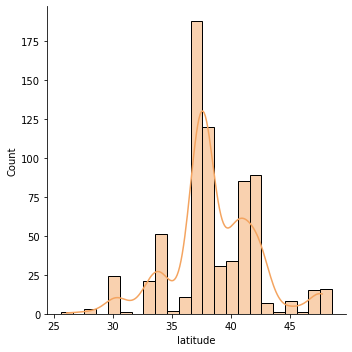

In [9]:
for col in ['latitude']:
    sns.displot(numeric_data[col], kde=True, color='sandybrown', discrete=True)

looks like latitude is more normal-distributed than uniform distributed (looks similar to a sinc function for f(x)>0. we will normalize it using z-score.

0   -1.638566
1   -0.377144
2   -1.585353
3   -0.354474
4   -0.226638
Name: latitude_norm, dtype: float64


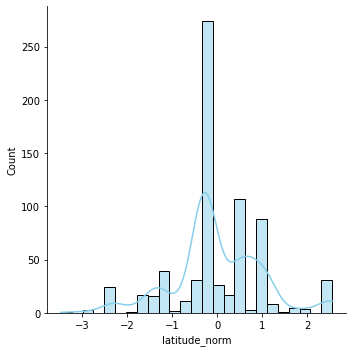

In [10]:
z_scaler = StandardScaler()
z_scaler.fit(pd.DataFrame(df  ['latitude']))
df['latitude_norm'] = z_scaler.transform(pd.DataFrame(df['latitude']))
print(df['latitude_norm'].head())
sns.displot(df['latitude_norm'], bins=25, kde=True, color='skyblue')

lets look for outliers with more that 3 standard deviations, and delete if exist:

In [11]:
data_mean = df['latitude_norm'].mean()
data_std = df['latitude_norm'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
df.loc[(df['latitude_norm'] > upper_bound) | (df['latitude_norm'] < lower_bound)]

,latitude,longitude,foundation_day,foundation_month,foundation_year,first_milestone_age_filled,last_milestone_age_filled,milestones,first_funding_age,last_funding_age,funding_rounds,total_funding,total_funding_min_max,rounds,connections,avg_group_size,in_Top500,target,latitude_norm
274,26.106273,-80.41894,11.0,11.0,2011.0,0.0685,0.4,2,0.0548,0.0548,1,100000.0,0.000542,0,4,1.0,0,0,-3.477877


In [12]:
df.drop(274, inplace=True)

In [13]:
df=df.drop('latitude', axis=1)

## normalizing latitude

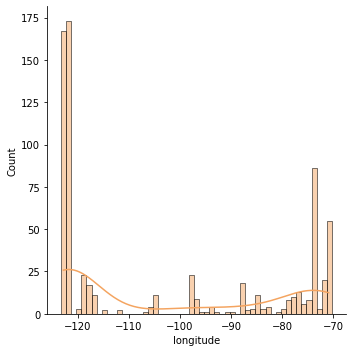

In [14]:
for col in ['longitude']:
    sns.displot(numeric_data[col], kde=True, color='sandybrown', discrete=True)

longitude has a very strong left tail so z-score wont fit. we will use min-max for it

[-122.7569561]
[-70.923675]


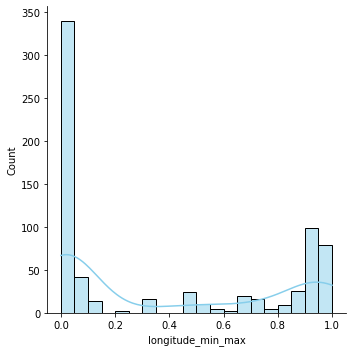

In [15]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['longitude']))
df['longitude_min_max'] = scaler.transform(pd.DataFrame(df['longitude']))
print(scaler.data_min_)
print(scaler.data_max_)
df[['longitude','longitude_min_max']].head()
sns.displot(df['longitude_min_max'], bins=20, kde=True, color='skyblue')

lets look for outliers with more that 3 standard deviations, and delete if exist:

In [16]:
data_mean = df['longitude_min_max'].mean()
data_std = df['longitude_min_max'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
df.loc[(df['longitude_min_max'] > upper_bound) | (df['longitude_min_max'] < lower_bound)]

,longitude,foundation_day,foundation_month,foundation_year,first_milestone_age_filled,last_milestone_age_filled,milestones,first_funding_age,last_funding_age,funding_rounds,total_funding,total_funding_min_max,rounds,connections,avg_group_size,in_Top500,target,latitude_norm,longitude_min_max


In [17]:
df=df.drop('longitude', axis=1)

## normalizing total_funding

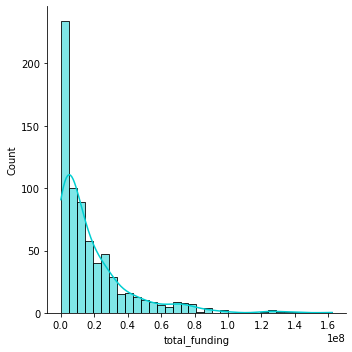

In [18]:
for col in ['total_funding']:
  sns.displot(numeric_data[col], kde=True, color='darkturquoise')


very strong left tail, will use min-max:

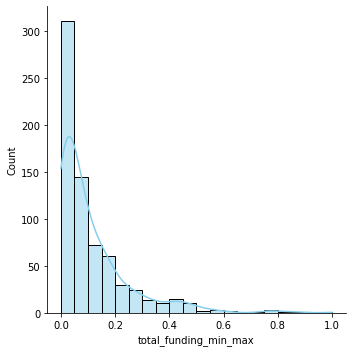

In [19]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['total_funding']))
df['total_funding_min_max'] = scaler.transform(pd.DataFrame(df['total_funding']))
sns.displot(df['total_funding_min_max'], bins=20, kde=True, color='skyblue')

looking for outliers:

In [20]:
data_mean = df['total_funding_min_max'].mean()
data_std = df['total_funding_min_max'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
df.loc[(df['total_funding_min_max'] > upper_bound) | (df['total_funding_min_max'] < lower_bound)]

,foundation_day,foundation_month,foundation_year,first_milestone_age_filled,last_milestone_age_filled,milestones,first_funding_age,last_funding_age,funding_rounds,total_funding,total_funding_min_max,rounds,connections,avg_group_size,in_Top500,target,latitude_norm,longitude_min_max
109,1.0,1.0,2006.0,3.3781,3.7753,2,2.8356,3.1397,2,125000000.0,0.770332,1100,0,2.0000,1,0,0.908171,0.965658
126,1.0,1.0,2000.0,8.0055,11.2548,3,6.1671,7.9205,3,100000000.0,0.616251,1000,6,2.5000,1,1,0.235037,0.890128
152,1.0,1.0,2001.0,4.4986,11.4164,3,2.3068,9.4247,7,98170000.0,0.604972,111,12,5.2000,1,0,-0.087333,0.001707
168,1.0,2.0,2007.0,3.0438,6.8411,5,0.7452,4.9178,6,125250000.0,0.771873,1111,30,3.5000,1,1,0.599061,0.940966
246,1.0,9.0,2005.0,3.6630,5.6110,5,0.0822,4.3260,7,88651133.0,0.546305,1111,12,3.1667,1,1,0.600785,0.941035
253,1.0,1.0,2004.0,5.9233,6.0000,2,4.0027,5.7534,4,89500000.0,0.551537,110,6,1.0000,1,0,-0.223266,0.007038
332,1.0,9.0,2007.0,4.7616,5.1507,3,0.0000,3.9562,5,90000000.0,0.554618,1111,24,3.8000,1,1,0.602472,0.940901
336,1.0,1.0,2007.0,999.0000,999.0000,0,3.0575,5.0110,4,89400001.0,0.550920,1100,2,4.3333,1,1,-1.568195,0.107408
351,1.0,1.0,2005.0,7.0521,8.6192,3,0.1616,7.5041,7,121500000.0,0.748761,1111,45,4.5000,1,1,1.051617,0.997075
408,1.0,1.0,2002.0,8.7041,8.7068,2,4.3315,11.1699,4,135826373.0,0.837058,101,3,4.3333,1,1,1.096182,0.993164


the funding to these startups seems ok, since a lot of them are known big companies, have a lot of connections, or require a large funding (from searching them on the web) so we wont delete them

In [21]:
df=df.drop('total_funding', axis=1)

## normalizing first/last_milestone_age_filled

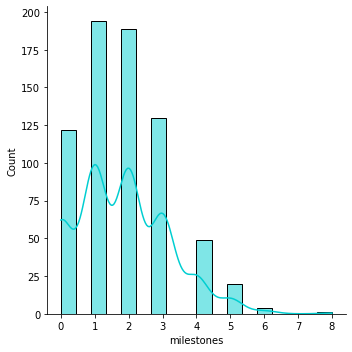

In [22]:
for col in ['milestones']:
  sns.displot(numeric_data[col], kde=True, color='darkturquoise')

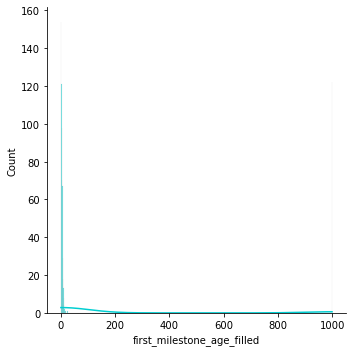

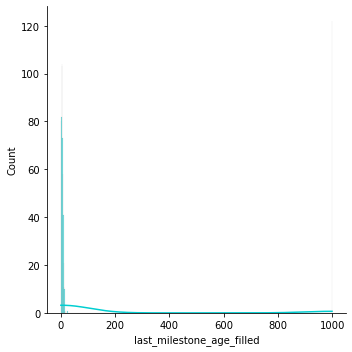

In [23]:
for col in ['first_milestone_age_filled', 'last_milestone_age_filled']:
  sns.displot(numeric_data[col], kde=True, color='darkturquoise')

we have a lot of values as '999', those who have 0 milestones. If we try to normalize it, it will ruin the results.
I decided that the best way to deal with that is that instead of 999, I will use the median of the values in those columns. I will also change the values in 'milestones' column accordingly:

In [24]:
median_value = df['first_milestone_age_filled'].median()
df['first_milestone_age_filled'] = np.where(df['first_milestone_age_filled'] == 999, median_value, df['first_milestone_age_filled'])
median_value = df['last_milestone_age_filled'].median()
df['last_milestone_age_filled'] = np.where(df['last_milestone_age_filled'] == 999, median_value, df['last_milestone_age_filled'])

In [25]:
median_value = np.round(df['milestones'].median())

# Replace 0 with the rounded median value
df['milestones'] = np.where(df['milestones'] == 0, median_value, df['milestones'])


In [26]:
df.to_csv('startup_dataset.csv', index=False)

Now we will normalize first/last milestone_age_filled:

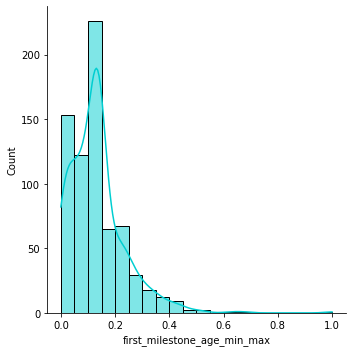

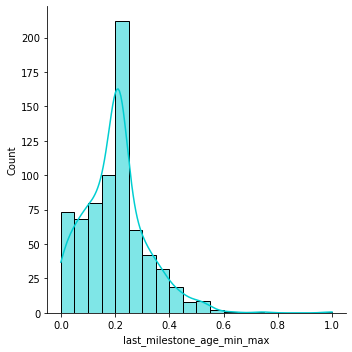

In [27]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['first_milestone_age_filled']))
df['first_milestone_age_min_max'] = scaler.transform(pd.DataFrame(df['first_milestone_age_filled']))
sns.displot(df['first_milestone_age_min_max'], bins=20, kde=True, color='darkturquoise')

scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['last_milestone_age_filled']))
df['last_milestone_age_min_max'] = scaler.transform(pd.DataFrame(df['last_milestone_age_filled']))
sns.displot(df['last_milestone_age_min_max'], bins=20, kde=True, color='darkturquoise')


looking for outliers:

In [28]:
data_mean = df['first_milestone_age_min_max'].mean()
data_std = df['first_milestone_age_min_max'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
df.loc[(df['first_milestone_age_min_max'] > upper_bound) | (df['first_milestone_age_min_max'] < lower_bound)]

,foundation_day,foundation_month,foundation_year,first_milestone_age_filled,last_milestone_age_filled,milestones,first_funding_age,last_funding_age,funding_rounds,total_funding_min_max,rounds,connections,avg_group_size,in_Top500,target,latitude_norm,longitude_min_max,first_milestone_age_min_max,last_milestone_age_min_max
256,1.0,1.0,2000.0,11.0329,11.0575,2.0,7.3534,8.1260,2,0.150926,0,13,5.5000,1,1,1.087236,0.989263,0.446949,0.447946
377,1.0,1.0,1998.0,12.5041,14.0329,2.0,7.6932,14.0329,3,0.148768,1100,3,2.3333,1,0,1.053569,0.993978,0.506549,0.568481
381,1.0,1.0,2000.0,11.5890,13.5863,5.0,0.8356,7.5863,4,0.203313,1110,35,2.5000,1,1,1.045520,0.997049,0.469477,0.550389
480,1.0,12.0,2000.0,10.9836,12.6822,3.0,3.6384,11.9041,7,0.014608,0,29,2.0000,1,1,0.327052,0.706088,0.444952,0.513763
487,10.0,4.0,1990.0,16.6630,18.3233,2.0,16.9863,16.9863,1,0.036906,1000,7,1.0000,1,0,-0.286626,0.008340,0.675028,0.742288
583,1.0,1.0,1999.0,11.8411,12.0548,2.0,8.0986,12.3671,4,0.149077,1010,11,2.3333,1,0,1.131526,0.995719,0.479690,0.488347
626,1.0,1.0,2000.0,13.0110,13.0110,1.0,6.8329,10.2712,2,0.055395,0,22,4.0000,1,1,-0.259582,0.016575,0.527083,0.527083
649,1.0,1.0,1984.0,24.6849,24.6849,1.0,21.8959,21.8959,1,0.049232,0,1,2.0000,0,0,-0.783379,0.851149,1.000000,1.000000
693,1.0,1.0,1995.0,15.4986,15.4986,1.0,10.8795,10.8795,1,0.006089,1000,3,2.0000,1,0,-1.142477,0.056891,0.627858,0.627858


In [29]:
data_mean = df['last_milestone_age_min_max'].mean()
data_std = df['last_milestone_age_min_max'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
df.loc[(df['last_milestone_age_min_max'] > upper_bound) | (df['last_milestone_age_min_max'] < lower_bound)]

,foundation_day,foundation_month,foundation_year,first_milestone_age_filled,last_milestone_age_filled,milestones,first_funding_age,last_funding_age,funding_rounds,total_funding_min_max,rounds,connections,avg_group_size,in_Top500,target,latitude_norm,longitude_min_max,first_milestone_age_min_max,last_milestone_age_min_max
377,1.0,1.0,1998.0,12.5041,14.0329,2.0,7.6932,14.0329,3,0.148768,1100,3,2.3333,1,0,1.053569,0.993978,0.506549,0.568481
487,10.0,4.0,1990.0,16.6630,18.3233,2.0,16.9863,16.9863,1,0.036906,1000,7,1.0000,1,0,-0.286626,0.008340,0.675028,0.742288
649,1.0,1.0,1984.0,24.6849,24.6849,1.0,21.8959,21.8959,1,0.049232,0,1,2.0000,0,0,-0.783379,0.851149,1.000000,1.000000
693,1.0,1.0,1995.0,15.4986,15.4986,1.0,10.8795,10.8795,1,0.006089,1000,3,2.0000,1,0,-1.142477,0.056891,0.627858,0.627858


Since milestones are subjective, I will assume that the values are fine and keep them.

In [30]:
df=df.drop(['first_milestone_age_filled', 'last_milestone_age_filled'], axis=1)

In [31]:
df.to_csv('startup_dataset.csv', index=False)

## normalizing first/last_funding_age


similarly to milestone_age:

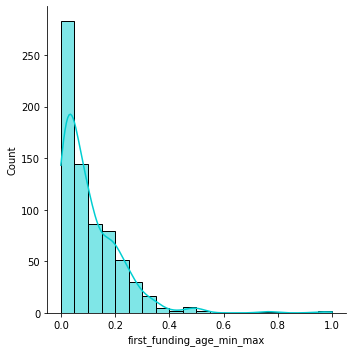

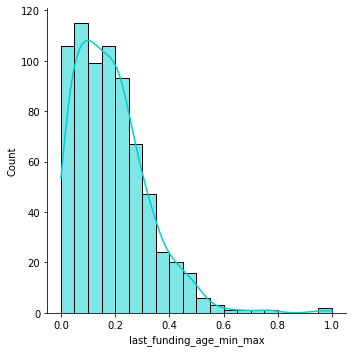

In [32]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['first_funding_age']))
df['first_funding_age_min_max'] = scaler.transform(pd.DataFrame(df['first_funding_age']))
sns.displot(df['first_funding_age_min_max'], bins=20, kde=True, color='darkturquoise')

scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['last_funding_age']))
df['last_funding_age_min_max'] = scaler.transform(pd.DataFrame(df['last_funding_age']))
sns.displot(df['last_funding_age_min_max'], bins=20, kde=True, color='darkturquoise')


In [33]:
df=df.drop(['first_funding_age', 'last_funding_age'], axis=1)

In [34]:
df.to_csv('startup_dataset.csv', index=False)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 708
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   foundation_day               708 non-null    float64
 1   foundation_month             708 non-null    float64
 2   foundation_year              708 non-null    float64
 3   milestones                   708 non-null    float64
 4   funding_rounds               708 non-null    int64  
 5   total_funding_min_max        708 non-null    float64
 6   rounds                       708 non-null    int64  
 7   connections                  708 non-null    int64  
 8   avg_group_size               708 non-null    float64
 9   in_Top500                    708 non-null    int64  
 10  target                       708 non-null    int64  
 11  latitude_norm                708 non-null    float64
 12  longitude_min_max            708 non-null    float64
 13  first_milestone_age_

In [36]:
data_mean = df['first_funding_age_min_max'].mean()
data_std = df['first_funding_age_min_max'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
df.loc[(df['first_funding_age_min_max'] > upper_bound) | (df['first_funding_age_min_max'] < lower_bound)]

,foundation_day,foundation_month,foundation_year,milestones,funding_rounds,total_funding_min_max,rounds,connections,avg_group_size,in_Top500,target,latitude_norm,longitude_min_max,first_milestone_age_min_max,last_milestone_age_min_max,first_funding_age_min_max,last_funding_age_min_max
100,1.0,1.0,1985.0,2.0,1,0.197150,100,2,7.0,1,0,-1.259503,0.742423,0.136071,0.214540,0.950201,0.950201
116,1.0,1.0,1997.0,2.0,1,0.012253,0,0,1.0,0,0,-0.281000,0.007541,0.136071,0.214540,0.491366,0.491366
183,1.0,1.0,2001.0,2.0,1,0.015950,0,0,1.0,1,0,-0.226638,0.006516,0.136071,0.214540,0.480980,0.480980
211,1.0,1.0,1996.0,2.0,1,0.045596,0,3,3.0,1,0,0.595395,0.940908,0.136071,0.214540,0.517640,0.517640
258,1.0,1.0,1992.0,2.0,1,0.036906,100,0,3.0,0,0,-2.348345,0.526413,0.136071,0.214540,0.749876,0.749876
327,1.0,1.0,1996.0,2.0,1,0.123191,10,1,5.0,1,0,-1.585353,0.107350,0.136071,0.214540,0.522148,0.522148
464,1.0,1.0,2000.0,1.0,1,0.001621,0,5,2.0,0,0,0.488554,0.939409,0.374917,0.374917,0.498121,0.498121
487,10.0,4.0,1990.0,2.0,1,0.036906,1000,7,1.0,1,0,-0.286626,0.008340,0.675028,0.742288,0.775775,0.775775
613,1.0,1.0,1999.0,1.0,1,0.129354,0,4,5.0,1,0,0.269475,0.345171,0.236517,0.236517,0.473349,0.473349
649,1.0,1.0,1984.0,1.0,1,0.049232,0,1,2.0,0,0,-0.783379,0.851149,1.000000,1.000000,1.000000,1.000000


In [37]:
df = df.loc[(df['first_funding_age_min_max'] <= upper_bound) & (df['first_funding_age_min_max'] >= lower_bound)]


In [38]:
data_mean = df['last_funding_age_min_max'].mean()
data_std = df['last_funding_age_min_max'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
df.loc[(df['last_funding_age_min_max'] > upper_bound) | (df['last_funding_age_min_max'] < lower_bound)]

,foundation_day,foundation_month,foundation_year,milestones,funding_rounds,total_funding_min_max,rounds,connections,avg_group_size,in_Top500,target,latitude_norm,longitude_min_max,first_milestone_age_min_max,last_milestone_age_min_max,first_funding_age_min_max,last_funding_age_min_max
339,1.0,1.0,1999.0,2.0,3,0.186672,1,9,4.5000,1,0,-0.226638,0.006516,0.283797,0.461156,0.427176,0.566567
377,1.0,1.0,1998.0,2.0,3,0.148768,1100,3,2.3333,1,0,1.053569,0.993978,0.506549,0.568481,0.351353,0.640892
480,1.0,12.0,2000.0,3.0,7,0.014608,0,29,2.0000,1,1,0.327052,0.706088,0.444952,0.513763,0.166168,0.543668
583,1.0,1.0,1999.0,2.0,4,0.149077,1010,11,2.3333,1,0,1.131526,0.995719,0.479690,0.488347,0.369868,0.564814
635,1.0,1.0,1997.0,1.0,7,1.000000,111,4,6.7500,1,0,-0.798553,0.840730,0.162152,0.162152,0.366365,0.683808


In [39]:
df = df.loc[(df['last_funding_age_min_max'] <= upper_bound) & (df['last_funding_age_min_max'] >= lower_bound)]


In [40]:
# Convert binary numbers to decimal
df['rounds'] = df['rounds'].apply(lambda x: int(str(x), 2))

In [41]:
df.to_csv('startup_dataset.csv', index=False)

# Introduction

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import  RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import make_classification

from sklearn.metrics import roc_curve, auc, roc_auc_score

from prettytable import PrettyTable


In [43]:
df = pd.read_csv("startup_dataset.csv")

In [44]:
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

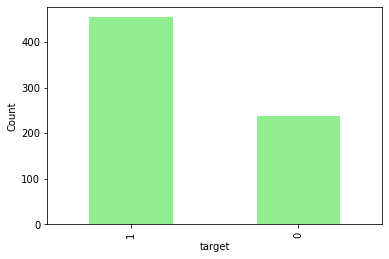

In [45]:
plt.figure()
y.value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('target')
plt.ylabel('Count')
plt.show()

as we can see, we have 2/3 of tranget=1 and 1/3 of target=0. that means that we might have to use SMOTE in our classifications.

 We decided to only use SMOTE, and not use RandomUnderSampler, because it will remove some of the data that we already have: in that case, the data will not reflect the original data even further.

in the project, we will present 4 measurements: precision, recall, accuracy and ROC-AUC.

mostly, we will present ROC-AUC and accuracy as the most important metrics. The reason for that is that we dont have a cost for incorrect classifing, so we only care that TP and TN are high, while FP and FN are as low as possible.

We sometimes will work with recall aswell: the reason for that is that the original data is imbalanced, and the classification models sometimes decide to classify everything as '1'- the majority class. Sometimes SMOTE will fix it, and sometimes it wont.

Out of accuracy and AUC, we decided that the most important metrics is ROC-AUC (but we will usually present both). The reason for that is that accuracy is more sensitive to class imbalance than ROC-AUC (We will apply SMOTE but not make everything 1:1).
also, ROC-AUC is primarily used for binary classification problems, like ours. It provides a useful summary of the model's overall performance in distinguishing between the two classes. Accuracy, on the other hand, does not provide insights into the model's predictive power as well as ROC-AUC (although we can apply it to binary classification as well).

# Classifiers

## logistic regression

              precision    recall  f1-score   support

           0       0.67      0.47      0.55        59
           1       0.76      0.88      0.82       114

    accuracy                           0.74       173
   macro avg       0.72      0.68      0.69       173
weighted avg       0.73      0.74      0.73       173



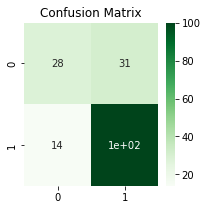

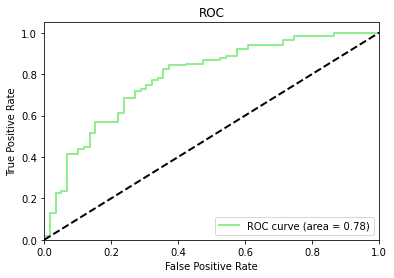

In [46]:

X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


clf_original = LogisticRegression(max_iter=2000)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
print(metrics.classification_report(y_test,y_pred_original))

cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_original))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

y_scores = clf_original.predict_proba(X_test)
# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1])
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='lightGreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()






In [47]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf_original = LogisticRegression(max_iter=10000)

cm_original = []
accuracy_original = []
recall_original = []
precision_original = []
roc_auc_original = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf_original.fit(X_train, y_train)

    y_pred_original = clf_original.predict(X_test)

    cm_original.append(metrics.confusion_matrix(y_test, y_pred_original))
    accuracy_original.append(metrics.accuracy_score(y_test, y_pred_original))
    recall_original.append(metrics.recall_score(y_test, y_pred_original, average='weighted'))
    precision_original.append(metrics.precision_score(y_test, y_pred_original, average='weighted'))
    roc_auc_original.append(metrics.roc_auc_score(y_test, y_pred_original, average='weighted'))


mean_accuracy = np.mean(accuracy_original)
mean_recall = np.mean(recall_original)
mean_precision = np.mean(precision_original)
mean_roc_auc = np.mean(roc_auc_original)


print("recalls for all folds:", recall_original)
table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)

recalls for all folds: [0.7553956834532374, 0.7028985507246377, 0.7536231884057971, 0.782608695652174, 0.7536231884057971]
+--------------------+--------------------+--------------------+-------------------+
|   Mean Accuracy    |    Mean Recall     |   Mean Precision   |    Mean ROC-AUC   |
+--------------------+--------------------+--------------------+-------------------+
| 0.7496298613283287 | 0.7496298613283287 | 0.7436096465840001 | 0.688712634153457 |
+--------------------+--------------------+--------------------+-------------------+


After doing cross-validation with 5 folds we can see that the ROC-AUC is actually a lot lower. The ROC is low, the accuracy is ok, and the recall is actually ok also

We will save the value of the ROC-AUC for the future:

In [48]:
original_ROC=np.mean(roc_auc_original)

Now we will run a gridSearch on the original classifier:

In [49]:

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'sag', 'lbfgs'],
    'max_iter':[10000]
}


grid_search = GridSearchCV(estimator=clf_original, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters for ROC-AUC:", best_params)

grid_search = GridSearchCV(estimator=clf_original, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters for accuracy:", best_params)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


Best parameters for ROC-AUC: {'C': 10, 'max_iter': 10000, 'solver': 'liblinear'}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters for accuracy: {'C': 0.01, 'max_iter': 10000, 'solver': 'sag'}


              precision    recall  f1-score   support

           0       0.70      0.40      0.51        48
           1       0.74      0.91      0.82        90

    accuracy                           0.73       138
   macro avg       0.72      0.65      0.66       138
weighted avg       0.73      0.73      0.71       138



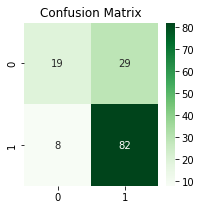

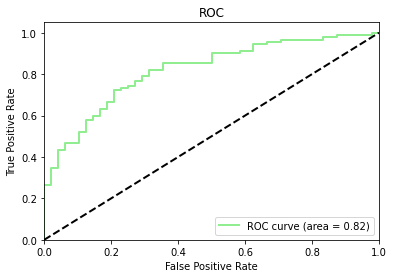

In [50]:
clf_a = LogisticRegression(C= 10, max_iter= 10000, solver= 'liblinear')
clf_a.fit(X_train, y_train)
y_pred_original = clf_a.predict(X_test)
print(metrics.classification_report(y_test,y_pred_original))

cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_original))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.title('Confusion Matrix')
plt.show()



y_scores = clf_a.predict_proba(X_test)
# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1])
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='lightGreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [51]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf_a = LogisticRegression(C= 10, max_iter= 10000, solver= 'liblinear')

cm_a = []
accuracy_a = []
recall_a = []
precision_a = []
roc_auc_a = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf_a.fit(X_train, y_train)

    y_pred_a = clf_a.predict(X_test)

    cm_a.append(metrics.confusion_matrix(y_test, y_pred_a))
    accuracy_a.append(metrics.accuracy_score(y_test, y_pred_a))
    recall_a.append(metrics.recall_score(y_test, y_pred_a, average='weighted'))
    precision_a.append(metrics.precision_score(y_test, y_pred_a, average='weighted'))
    roc_auc_a.append(metrics.roc_auc_score(y_test, y_pred_a, average='weighted'))



mean_accuracy = np.mean(accuracy_a)
mean_recall = np.mean(recall_a)
mean_precision = np.mean(precision_a)
mean_roc_auc = np.mean(roc_auc_a)


print("recalls for all folds:", recall_a)
print("precisions for all folds:", precision_a)

table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)

recalls for all folds: [0.7697841726618705, 0.7246376811594203, 0.7753623188405797, 0.782608695652174, 0.7318840579710145]
precisions for all folds: [0.7631068042762051, 0.718977879481312, 0.7684533435717249, 0.7813503558742183, 0.7265526395961178]
+--------------------+--------------------+--------------------+--------------------+
|   Mean Accuracy    |    Mean Recall     |   Mean Precision   |    Mean ROC-AUC    |
+--------------------+--------------------+--------------------+--------------------+
| 0.7568553852570118 | 0.7568553852570118 | 0.7516882045599156 | 0.6944872831838124 |
+--------------------+--------------------+--------------------+--------------------+


Good. we managed to up the roc-auc by 2, and so did all the other metrics

              precision    recall  f1-score   support

           0       0.69      0.56      0.62        48
           1       0.79      0.87      0.83        90

    accuracy                           0.76       138
   macro avg       0.74      0.71      0.72       138
weighted avg       0.75      0.76      0.75       138



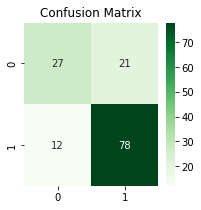

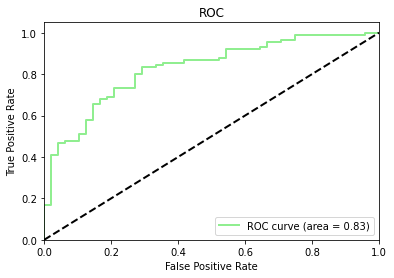

In [52]:
clf_a = LogisticRegression(C= 0.01, max_iter= 10000, solver= 'sag')
clf_a.fit(X_train, y_train)
y_pred_original = clf_a.predict(X_test)
print(metrics.classification_report(y_test,y_pred_original))

cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_original))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.title('Confusion Matrix')
plt.show()



y_scores = clf_a.predict_proba(X_test)
# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1])
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='lightGreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [53]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf_a = LogisticRegression(C= 0.01, max_iter= 10000, solver= 'sag')

cm_a = []
accuracy_a = []
recall_a = []
precision_a = []
roc_auc_a = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf_a.fit(X_train, y_train)

    y_pred_a = clf_a.predict(X_test)

    cm_a.append(metrics.confusion_matrix(y_test, y_pred_a))
    accuracy_a.append(metrics.accuracy_score(y_test, y_pred_a))
    recall_a.append(metrics.recall_score(y_test, y_pred_a, average='weighted'))
    precision_a.append(metrics.precision_score(y_test, y_pred_a, average='weighted'))
    roc_auc_a.append(metrics.roc_auc_score(y_test, y_pred_a, average='weighted'))


mean_accuracy = np.mean(accuracy_a)
mean_recall = np.mean(recall_a)
mean_precision = np.mean(precision_a)
mean_roc_auc = np.mean(roc_auc_a)


print("recalls for all folds:", recall_a)
print("precisions for all folds:", precision_a)

table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)

recalls for all folds: [0.8057553956834532, 0.7463768115942029, 0.7536231884057971, 0.7463768115942029, 0.7608695652173914]
precisions for all folds: [0.8091292483254776, 0.7518361711516868, 0.7446244198162355, 0.7377806194941745, 0.7546366676801459]
+--------------------+--------------------+--------------------+--------------------+
|   Mean Accuracy    |    Mean Recall     |   Mean Precision   |    Mean ROC-AUC    |
+--------------------+--------------------+--------------------+--------------------+
| 0.7626003544990096 | 0.7626003544990096 | 0.7596014252935441 | 0.7040485035333542 |
+--------------------+--------------------+--------------------+--------------------+


both of these results are ok, but the second one is better, as accuracy and ROC-AUC is both higher.

Now we will try to apply SMOTE and see difference:

In [54]:
best_sampling_strategy = None
best_recall_tp = 0.0
best_recall_tn = 0.0

k_neighbors_values = [3, 4, 5, 6, 7]

for sampling_strategy in [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
    for k_neighbors in k_neighbors_values:
        smote_b = SMOTE(sampling_strategy=sampling_strategy, random_state=42, k_neighbors=k_neighbors)
        X_resampled_b, y_resampled_b = smote_b.fit_resample(X, y)
        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_resampled_b, y_resampled_b, test_size=0.25, random_state=42)

        clf_b = LogisticRegression(max_iter= 10000)
        clf_b.fit(X_train_b, y_train_b)
        y_pred_b = clf_b.predict(X_test_b)

        report = metrics.classification_report(y_test_b, y_pred_b, output_dict=True)
        recall_tp = report['1']['recall']
        recall_tn = report['0']['recall']

        if recall_tp > best_recall_tp and recall_tn > best_recall_tn:
            best_recall_tp = recall_tp
            best_recall_tn = recall_tn
            best_sampling_strategy = sampling_strategy
            best_k_neighbors = k_neighbors

print("Best Sampling Strategy:", best_sampling_strategy)
print("Best k_neighbors:", best_k_neighbors)
print("Best Recall TP:", best_recall_tp)
print("Best Recall TN:", best_recall_tn)

Best Sampling Strategy: 0.7
Best k_neighbors: 3
Best Recall TP: 0.875
Best Recall TN: 0.6179775280898876


In [55]:
smote_b = SMOTE(sampling_strategy=0.7, random_state=42, k_neighbors=3)
X_resampled_b, y_resampled_b = smote_b.fit_resample(X, y)
#rus_b = RandomUnderSampler(sampling_strategy=0.9, random_state=42)
#X_resampled_b, y_resampled_b = rus_b.fit_resample(X_resampled_b, y_resampled_b)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_resampled_b, y_resampled_b, test_size=0.25, random_state=42)

clf_b = LogisticRegression(max_iter=10000)
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict(X_test_b)


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'sag', 'lbfgs',  'newton-cg', 'newton-cholesky'],
    'max_iter':[10000]
}

grid_search = GridSearchCV(estimator=clf_b, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train_b, y_train_b)
best_params = grid_search.best_params_
print("Best parameters for ROC-AUC:", best_params)


grid_search = GridSearchCV(estimator=clf_b, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_b, y_train_b)
best_params = grid_search.best_params_
print("Best parameters for accuracy:", best_params)



Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError(
ValueEr

Best parameters for ROC-AUC: {'C': 10, 'max_iter': 10000, 'solver': 'lbfgs'}
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters for accuracy: {'C': 0.001, 'max_iter': 10000, 'solver': 'lbfgs'}


c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError(
ValueEr

              precision    recall  f1-score   support

           0       0.82      0.61      0.70        89
           1       0.72      0.88      0.80       104

    accuracy                           0.76       193
   macro avg       0.77      0.75      0.75       193
weighted avg       0.77      0.76      0.75       193



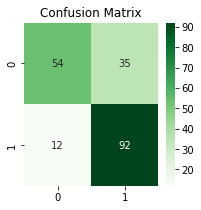

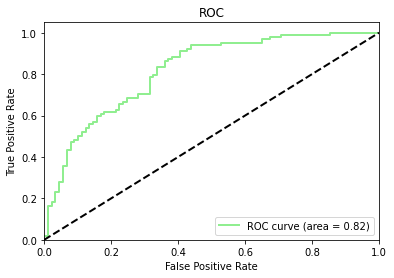

In [56]:
clf_b = LogisticRegression(C= 10, max_iter= 10000, solver= 'lbfgs')
clf_b.fit(X_train_b, y_train_b)
y_pred_original = clf_b.predict(X_test_b)
print(metrics.classification_report(y_test_b,y_pred_original))

cm = pd.DataFrame(metrics.confusion_matrix(y_test_b, y_pred_original))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.title('Confusion Matrix')
plt.show()



y_scores = clf_b.predict_proba(X_test_b)
# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test_b, y_scores[:, 1])
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='lightGreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [57]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf_b = LogisticRegression(C= 10, max_iter= 10000, solver= 'lbfgs')

cm_b = []
accuracy_b = []
recall_b = []
precision_b = []
roc_auc_b = []

for train_index, test_index in kf.split(X_resampled_b):
    X_train_b, X_test_b = X_resampled_b.iloc[train_index], X_resampled_b.iloc[test_index]
    y_train_b, y_test_b = y_resampled_b.iloc[train_index], y_resampled_b.iloc[test_index]

    clf_b.fit(X_train_b, y_train_b)

    y_pred_b = clf_b.predict(X_test_b)

    cm_b.append(metrics.confusion_matrix(y_test_b, y_pred_b))
    accuracy_b.append(metrics.accuracy_score(y_test_b, y_pred_b))
    recall_b.append(metrics.recall_score(y_test_b, y_pred_b, average='weighted'))
    precision_b.append(metrics.precision_score(y_test_b, y_pred_b, average='weighted'))
    roc_auc_b.append(metrics.roc_auc_score(y_test_b, y_pred_b, average='weighted'))


mean_accuracy = np.mean(accuracy_b)
mean_recall = np.mean(recall_b)
mean_precision = np.mean(precision_b)
mean_roc_auc = np.mean(roc_auc_b)


print("recalls for all folds:", recall_b)
table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)

recalls for all folds: [0.7354838709677419, 0.7142857142857143, 0.7532467532467533, 0.7597402597402597, 0.7662337662337663]
+--------------------+--------------------+--------------------+--------------------+
|   Mean Accuracy    |    Mean Recall     |   Mean Precision   |    Mean ROC-AUC    |
+--------------------+--------------------+--------------------+--------------------+
| 0.7457980728948471 | 0.7457980728948471 | 0.7462092578783326 | 0.7281366775550797 |
+--------------------+--------------------+--------------------+--------------------+


second option:

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        61
           1       0.85      0.83      0.84        93

    accuracy                           0.81       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.81      0.81      0.81       154



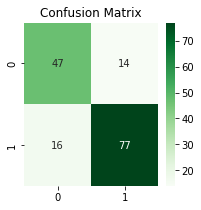

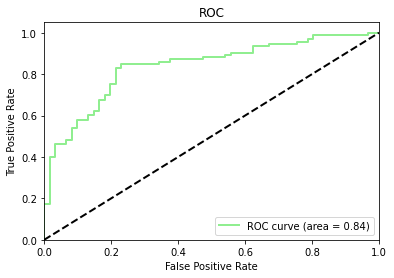

In [58]:
clf_b = LogisticRegression(C= 0.001, max_iter= 10000, solver= 'lbfgs')
clf_b.fit(X_train_b, y_train_b)
y_pred_original = clf_b.predict(X_test_b)
print(metrics.classification_report(y_test_b,y_pred_original))

cm = pd.DataFrame(metrics.confusion_matrix(y_test_b, y_pred_original))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.title('Confusion Matrix')
plt.show()



y_scores = clf_b.predict_proba(X_test_b)
# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test_b, y_scores[:, 1])
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='lightGreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


In [59]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf_b = LogisticRegression(C= 0.001, max_iter= 10000, solver= 'lbfgs')

cm_b = []
accuracy_b = []
recall_b = []
precision_b = []
roc_auc_b = []

for train_index, test_index in kf.split(X_resampled_b):
    X_train_b, X_test_b = X_resampled_b.iloc[train_index], X_resampled_b.iloc[test_index]
    y_train_b, y_test_b = y_resampled_b.iloc[train_index], y_resampled_b.iloc[test_index]

    clf_b.fit(X_train_b, y_train_b)

    y_pred_b = clf_b.predict(X_test_b)

    cm_b.append(metrics.confusion_matrix(y_test_b, y_pred_b))
    accuracy_b.append(metrics.accuracy_score(y_test_b, y_pred_b))
    recall_b.append(metrics.recall_score(y_test_b, y_pred_b, average='weighted'))
    precision_b.append(metrics.precision_score(y_test_b, y_pred_b, average='weighted'))
    roc_auc_b.append(metrics.roc_auc_score(y_test_b, y_pred_b, average='weighted'))


mean_accuracy = np.mean(accuracy_b)
mean_recall = np.mean(recall_b)
mean_precision = np.mean(precision_b)
mean_roc_auc = np.mean(roc_auc_b)


print("recalls for all folds:", recall_b)
table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)

recalls for all folds: [0.6967741935483871, 0.7207792207792207, 0.7142857142857143, 0.7662337662337663, 0.8051948051948052]
+--------------------+--------------------+--------------------+--------------------+
|   Mean Accuracy    |    Mean Recall     |   Mean Precision   |    Mean ROC-AUC    |
+--------------------+--------------------+--------------------+--------------------+
| 0.7406535400083787 | 0.7406535400083787 | 0.7443340143840408 | 0.7295846106852714 |
+--------------------+--------------------+--------------------+--------------------+


We can see that the results are pretty much the same, but the second one has slightly better ROC-AUC

we will save this result for later comparison:

We managed to fix recall, accuracy, and the ROC-AUC is also higher

In [60]:
best_roc_auc = mean_roc_auc


In [61]:
clf_b = LogisticRegression(C= 0.001, max_iter= 10000, solver= 'lbfgs')
clf_b.fit(X_train_b, y_train_b)
y_pred_original = clf_b.predict(X_train_b)
print(metrics.classification_report(y_train_b,y_pred_original))

              precision    recall  f1-score   support

           0       0.71      0.64      0.68       256
           1       0.76      0.82      0.79       361

    accuracy                           0.75       617
   macro avg       0.74      0.73      0.73       617
weighted avg       0.74      0.75      0.74       617



We can also see that we dont overfit the data, and the results for training set and test set are very similar

Fitting 5 folds for each of 6 candidates, totalling 30 fits


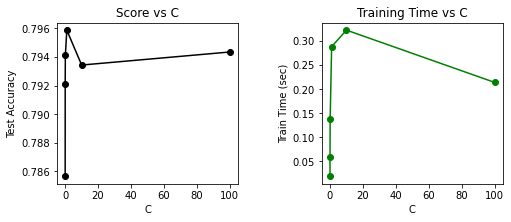

In [62]:
param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
}

grid_search = GridSearchCV(estimator=clf_b, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train_b, y_train_b)
best_params = grid_search.best_params_


test_scores = grid_search.cv_results_['mean_test_score']
train_time = grid_search.cv_results_['mean_fit_time']
param_values = list(grid_search.cv_results_['param_C'])

plt.subplots(1, 2, figsize=(8, 4))
plt.subplot(121)
plt.plot(param_values, test_scores, 'ko-', label='test')
plt.xlabel('C')
plt.ylabel('Test Accuracy')
plt.title('Score vs C')

plt.subplot(122)
plt.plot(param_values, train_time, 'o-', color='green')
plt.xlabel('C')
plt.ylabel('Train Time (sec)')
plt.title('Training Time vs C')

plt.tight_layout(pad=4)
plt.show()

We can see that like in the results we got, the best C is 1: the reason for that is that the accuracy for it is almost the highest, and its training time is the lowest

We saved the ROC-AUC of the most original classifier and the most optimized one:

In [63]:
print('Base model ROC-AUC: {:0.2f}'.format(original_ROC))
print('Optimized model ROC-AUC: {:0.2f}'.format(best_roc_auc))


improvement = 100 * (best_roc_auc - original_ROC) / original_ROC
print('Improvement: {:0.2f}%'.format(improvement))



Base model ROC-AUC: 0.69
Optimized model ROC-AUC: 0.73
Improvement: 5.93%


We can see that we managed to increase the improvement by alot. Remember that these results are the mean for 5 folds, thats why its lower than when comparing only the first fold

Overall, our optimzed model is ok- we managed to reach ROC-AUC of 0.73 and accuracy of 0.73. The accuracy is almost as the original, but we upped the ROC-AUC a lot

## SVM

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.66      1.00      0.79       114

    accuracy                           0.66       173
   macro avg       0.33      0.50      0.40       173
weighted avg       0.43      0.66      0.52       173



c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


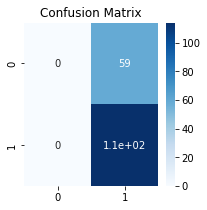

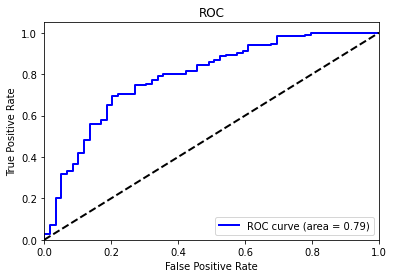

In [64]:
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf_original = SVC(probability=True)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
print(metrics.classification_report(y_test,y_pred_original))

cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_original))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()



y_scores = clf_original.predict_proba(X_test)
# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [65]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf_original = SVC(probability=True)

cm_original = []
accuracy_original = []
recall_original = []
precision_original = []
roc_auc_original = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf_original.fit(X_train, y_train)

    y_pred_original = clf_original.predict(X_test)

    cm_original.append(metrics.confusion_matrix(y_test, y_pred_original))
    accuracy_original.append(metrics.accuracy_score(y_test, y_pred_original))
    recall_original.append(metrics.recall_score(y_test, y_pred_original, average='weighted'))
    precision_original.append(metrics.precision_score(y_test, y_pred_original, average='weighted'))
    roc_auc_original.append(metrics.roc_auc_score(y_test, y_pred_original, average='weighted'))



mean_accuracy = np.mean(accuracy_original)
mean_recall = np.mean(recall_original)
mean_precision = np.mean(precision_original)
mean_roc_auc = np.mean(roc_auc_original)


print("recalls for all folds:", recall_original)
table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)

original_ROC=np.mean(roc_auc_original)

c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetri

recalls for all folds: [0.6690647482014388, 0.6231884057971014, 0.6811594202898551, 0.6594202898550725, 0.6521739130434783]
+--------------------+--------------------+--------------------+--------------+
|   Mean Accuracy    |    Mean Recall     |   Mean Precision   | Mean ROC-AUC |
+--------------------+--------------------+--------------------+--------------+
| 0.6570013554373892 | 0.6570013554373892 | 0.4320311027564778 |     0.5      |
+--------------------+--------------------+--------------------+--------------+


c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We get very bad results: low accuracy, low recall, low precision and low AUC.
The SVC classifier classifies everything as '1': thats why with have 0 in TN, recall=0 for '0' and we cant calculate precision and F-score for '0's. That means that we dont have enough samples for '0', so everything is very skewed.
In that case we will apply SMOTE:

In [66]:
best_sampling_strategy = None
best_recall_tp = 0.0
best_recall_tn = 0.0
best_k_neighbors=0
k_neighbors_values = [3, 4, 5, 6, 7]

for sampling_strategy in [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
    for k_neighbors in k_neighbors_values:
        smote_b = SMOTE(sampling_strategy=sampling_strategy, random_state=42, k_neighbors=k_neighbors)
        X_resampled_b, y_resampled_b = smote_b.fit_resample(X, y)
        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_resampled_b, y_resampled_b, test_size=0.25, random_state=42)

        clf_b = SVC()
        clf_b.fit(X_train_b, y_train_b)
        y_pred_b = clf_b.predict(X_test_b)

        report = metrics.classification_report(y_test_b, y_pred_b, output_dict=True)
        recall_tp = report['1']['recall']
        recall_tn = report['0']['recall']

        if recall_tp > best_recall_tp and recall_tn > best_recall_tn:
            best_recall_tp = recall_tp
            best_recall_tn = recall_tn
            best_sampling_strategy = sampling_strategy
            best_k_neighbors = k_neighbors

print("Best Sampling Strategy:", best_sampling_strategy)
print("Best k_neighbors:", best_k_neighbors)
print("Best Recall TP:", best_recall_tp)
print("Best Recall TN:", best_recall_tn)

c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\

Best Sampling Strategy: None
Best k_neighbors: 0
Best Recall TP: 0.0
Best Recall TN: 0.0


c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\

Basically, what we get is that smote doesnt help: the recall stays 0 for '0's. After searching online, we found that the reason is gamma value: the default kernel is 'rbf', and default gamma=scale. Low	Gamma = Radius of influence is large. High Gamma = Radius of influence is small. We played a bit with the value of gamma, and settled on gamma=0.1:

              precision    recall  f1-score   support

           0       0.72      0.47      0.57        59
           1       0.77      0.90      0.83       114

    accuracy                           0.76       173
   macro avg       0.74      0.69      0.70       173
weighted avg       0.75      0.76      0.74       173



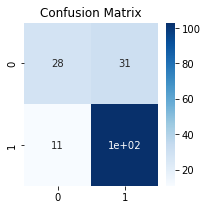

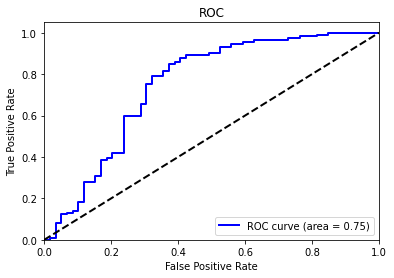

In [67]:
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf_b = SVC(gamma=0.1, probability=True)
clf_b.fit(X_train, y_train)
y_pred_b = clf_b.predict(X_test)
print(metrics.classification_report(y_test,y_pred_b))

cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_b))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()



y_scores = clf_b.predict_proba(X_test)
# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [68]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf_a = SVC(gamma=0.1, probability=True)

cm_a = []
accuracy_a = []
recall_a = []
precision_a = []
roc_auc_a = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf_a.fit(X_train, y_train)

    y_pred_a = clf_a.predict(X_test)

    cm_a.append(metrics.confusion_matrix(y_test, y_pred_a))
    accuracy_a.append(metrics.accuracy_score(y_test, y_pred_a))
    recall_a.append(metrics.recall_score(y_test, y_pred_a, average='weighted'))
    precision_a.append(metrics.precision_score(y_test, y_pred_a, average='weighted'))
    roc_auc_a.append(metrics.roc_auc_score(y_test, y_pred_a, average='weighted'))


mean_accuracy = np.mean(accuracy_a)
mean_recall = np.mean(recall_a)
mean_precision = np.mean(precision_a)
mean_roc_auc = np.mean(roc_auc_a)


print("recalls for all folds:", recall_a)
print("precisions for all folds:", precision_a)

table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)

recalls for all folds: [0.7769784172661871, 0.7028985507246377, 0.7681159420289855, 0.782608695652174, 0.7318840579710145]
precisions for all folds: [0.7812192351382052, 0.7120352867044737, 0.7601591361182154, 0.8097538532321141, 0.7294651789149673]
+--------------------+--------------------+--------------------+--------------------+
|   Mean Accuracy    |    Mean Recall     |   Mean Precision   |    Mean ROC-AUC    |
+--------------------+--------------------+--------------------+--------------------+
| 0.7524971327285997 | 0.7524971327285997 | 0.7585265380215951 | 0.6735469293277646 |
+--------------------+--------------------+--------------------+--------------------+


The results after cross-validation are alot better. now the accuracy and recall are 0.75, precision is 0.76 and ROC-AUC is 0.67. We will try to make ROC-AUC higher.

First we will apply SMOTE in order to generate more samples for the minority class:

In [69]:
best_sampling_strategy = None
best_recall_tp = 0.0
best_recall_tn = 0.0

k_neighbors_values = [3, 4, 5, 6, 7]

for sampling_strategy in [0.7, 0.75, 0.8, 0.85, 0.9]:
    for k_neighbors in k_neighbors_values:
        smote_b = SMOTE(sampling_strategy=sampling_strategy, random_state=42, k_neighbors=k_neighbors)
        X_resampled_b, y_resampled_b = smote_b.fit_resample(X, y)
        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_resampled_b, y_resampled_b, test_size=0.25, random_state=42)

        clf_b = SVC(gamma=0.1, probability=True)
        clf_b.fit(X_train_b, y_train_b)
        y_pred_b = clf_b.predict(X_test_b)

        report = metrics.classification_report(y_test_b, y_pred_b, output_dict=True)
        recall_tp = report['1']['recall']
        recall_tn = report['0']['recall']

        if recall_tp > best_recall_tp and recall_tn > best_recall_tn:
            best_recall_tp = recall_tp
            best_recall_tn = recall_tn
            best_sampling_strategy = sampling_strategy
            best_k_neighbors = k_neighbors

print("Best Sampling Strategy:", best_sampling_strategy)
print("Best k_neighbors:", best_k_neighbors)
print("Best Recall TP:", best_recall_tp)
print("Best Recall TN:", best_recall_tn)

Best Sampling Strategy: 0.7
Best k_neighbors: 3
Best Recall TP: 0.9519230769230769
Best Recall TN: 0.6179775280898876


In [70]:
smote_b = SMOTE(sampling_strategy=0.7, random_state=42, k_neighbors=3)
X_resampled_b, y_resampled_b = smote_b.fit_resample(X, y)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_resampled_b, y_resampled_b, test_size=0.25, random_state=42)

clf_b = SVC(gamma=0.1, probability=True)
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict(X_test_b)


Now we will run a grid search:

In [71]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf'],
    'gamma': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(estimator=clf_b, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train_b, y_train_b)
best_params = grid_search.best_params_
print("Best parameters for ROC-AUC:", best_params)

grid_search = GridSearchCV(estimator=clf_b, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_b, y_train_b)
best_params = grid_search.best_params_
print("Best parameters for accuracy:", best_params)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


Best parameters for ROC-AUC: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters for accuracy: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.91      0.58      0.71        89
           1       0.73      0.95      0.82       104

    accuracy                           0.78       193
   macro avg       0.82      0.77      0.77       193
weighted avg       0.81      0.78      0.77       193



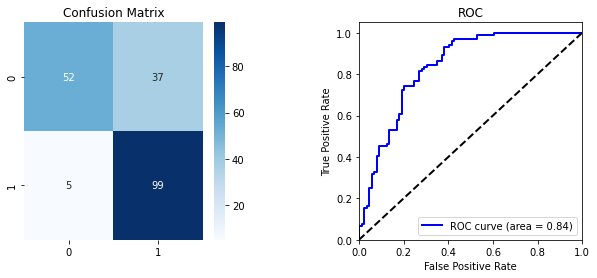

              precision    recall  f1-score   support

           0       0.79      0.61      0.69        89
           1       0.72      0.87      0.79       104

    accuracy                           0.75       193
   macro avg       0.76      0.74      0.74       193
weighted avg       0.75      0.75      0.74       193



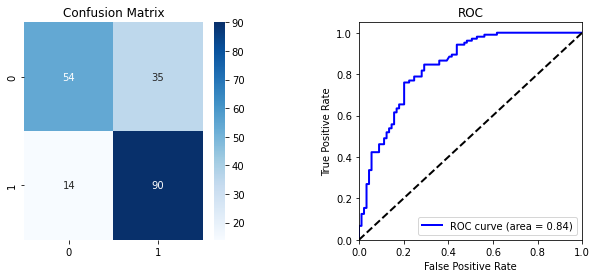

In [72]:
# for best ROC-AUC
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf_b = SVC(C=10,gamma=0.01,probability=True)
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict(X_test_b)
print(metrics.classification_report(y_test_b,y_pred_b))


cm = pd.DataFrame(metrics.confusion_matrix(y_test_b, y_pred_b))
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')

# Second plot (ROC curve)

y_scores = clf_b.predict_proba(X_test_b)
fpr, tpr, _ = roc_curve(y_test_b, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

plt.subplots_adjust(wspace=0.5)
plt.show()


# for best accuracy
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf_b = SVC(C=1,gamma=0.01,probability=True)
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict(X_test_b)
print(metrics.classification_report(y_test_b,y_pred_b))


cm = pd.DataFrame(metrics.confusion_matrix(y_test_b, y_pred_b))
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')

# Second plot (ROC curve)
y_scores = clf_b.predict_proba(X_test_b)
fpr, tpr, _ = roc_curve(y_test_b, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

plt.subplots_adjust(wspace=0.5)
plt.show()

We get accuracy~0.75 for the first option and accuracy of ~0.79 for the second. We also see better recalls. ROC for both is 0.84
However, this is before cross-validation (we chose the second because it had better results after checking both):

In [73]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf_b = SVC(C=1,gamma=0.01,probability=True)

cm_b = []
accuracy_b = []
recall_b = []
precision_b = []
roc_auc_b = []

for train_index, test_index in kf.split(X_resampled_b):
    X_train_b, X_test_b = X_resampled_b.iloc[train_index], X_resampled_b.iloc[test_index]
    y_train_b, y_test_b = y_resampled_b.iloc[train_index], y_resampled_b.iloc[test_index]

    clf_b.fit(X_train_b, y_train_b)

    y_pred_b = clf_b.predict(X_test_b)

    cm_b.append(metrics.confusion_matrix(y_test_b, y_pred_b))
    accuracy_b.append(metrics.accuracy_score(y_test_b, y_pred_b))
    recall_b.append(metrics.recall_score(y_test_b, y_pred_b, average='weighted'))
    precision_b.append(metrics.precision_score(y_test_b, y_pred_b, average='weighted'))
    roc_auc_b.append(metrics.roc_auc_score(y_test_b, y_pred_b, average='weighted'))

mean_accuracy = np.mean(accuracy_b)
mean_recall = np.mean(recall_b)
mean_precision = np.mean(precision_b)
mean_roc_auc = np.mean(roc_auc_b)


print("recalls for all folds:", recall_b)
table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)

optimized_ROC=np.mean(roc_auc_b)

recalls for all folds: [0.7612903225806451, 0.7142857142857143, 0.7337662337662337, 0.7922077922077922, 0.7727272727272727]
+--------------------+--------------------+--------------------+--------------------+
|   Mean Accuracy    |    Mean Recall     |   Mean Precision   |    Mean ROC-AUC    |
+--------------------+--------------------+--------------------+--------------------+
| 0.7548554671135316 | 0.7548554671135316 | 0.7577430987903789 | 0.7312913646204827 |
+--------------------+--------------------+--------------------+--------------------+


We get mean ROC-AUC of ~0.73 and mean accuracy ~0.75, which is better.

on training set:

In [74]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf_b = SVC(C=1,gamma=0.01,probability=True)

cm_b = []
accuracy_b = []
recall_b = []
precision_b = []
roc_auc_b = []

for train_index, test_index in kf.split(X_resampled_b):
    X_train_b, X_test_b = X_resampled_b.iloc[train_index], X_resampled_b.iloc[test_index]
    y_train_b, y_test_b = y_resampled_b.iloc[train_index], y_resampled_b.iloc[test_index]

    clf_b.fit(X_train_b, y_train_b)

    y_pred_b = clf_b.predict(X_train_b)

    cm_b.append(metrics.confusion_matrix(y_train_b, y_pred_b))
    accuracy_b.append(metrics.accuracy_score(y_train_b, y_pred_b))
    recall_b.append(metrics.recall_score(y_train_b, y_pred_b, average='weighted'))
    precision_b.append(metrics.precision_score(y_train_b, y_pred_b, average='weighted'))
    roc_auc_b.append(metrics.roc_auc_score(y_train_b, y_pred_b, average='weighted'))

mean_accuracy = np.mean(accuracy_b)
mean_recall = np.mean(recall_b)
mean_precision = np.mean(precision_b)
mean_roc_auc = np.mean(roc_auc_b)


print("recalls for all folds:", recall_b)
table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)


recalls for all folds: [0.7840909090909091, 0.7860615883306321, 0.8055105348460292, 0.7860615883306321, 0.7779578606158833]
+--------------------+--------------------+--------------------+--------------------+
|   Mean Accuracy    |    Mean Recall     |   Mean Precision   |    Mean ROC-AUC    |
+--------------------+--------------------+--------------------+--------------------+
| 0.7879364962428171 | 0.7879364962428171 | 0.7894124768930119 | 0.7663534927825151 |
+--------------------+--------------------+--------------------+--------------------+


We can see that we dont overfit on the data

Fitting 5 folds for each of 4 candidates, totalling 20 fits


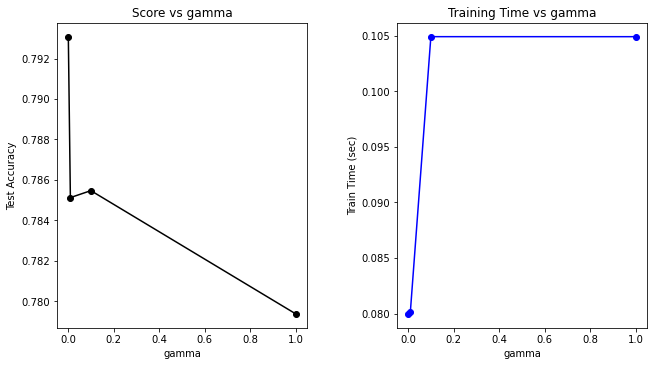

In [75]:
param_grid = {
    'gamma': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(estimator=clf_b, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train_b, y_train_b)

test_scores = grid_search.cv_results_['mean_test_score']
train_time = grid_search.cv_results_['mean_fit_time']
param_values = list(grid_search.cv_results_['param_gamma'])

plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.plot(param_values, test_scores, 'o-', label='test', color='black')
plt.xlabel('gamma')
plt.ylabel('Test Accuracy')
plt.title('Score vs gamma')

plt.subplot(122)
plt.plot(param_values, train_time, 'o-', color='blue')
plt.xlabel('gamma')
plt.ylabel('Train Time (sec)')
plt.title('Training Time vs gamma')

plt.tight_layout(pad=4)
plt.show()

Fitting 5 folds for each of 6 candidates, totalling 30 fits


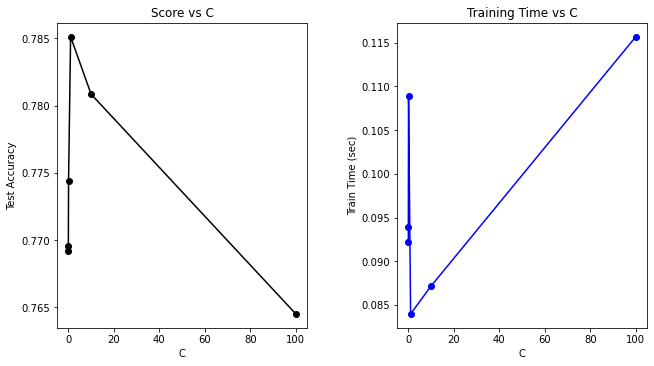

In [76]:

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}


grid_search = GridSearchCV(estimator=clf_b, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train_b, y_train_b)

test_scores = grid_search.cv_results_['mean_test_score']
train_time = grid_search.cv_results_['mean_fit_time']
param_values = list(grid_search.cv_results_['param_C'])

plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.plot(param_values, test_scores, 'o-', label='test', color='black')
plt.xlabel('C')
plt.ylabel('Test Accuracy')
plt.title('Score vs C')

plt.subplot(122)
plt.plot(param_values, train_time, 'o-', color='blue')
plt.xlabel('C')
plt.ylabel('Train Time (sec)')
plt.title('Training Time vs C')

plt.tight_layout(pad=4)
plt.show()

We can see the effects of different gamma values and different C values. Even though the gamma value that we chose has the highest training time, we will still choose it, because low	Gamma will cause the radius of influence to be larger, and we dont want that. The C value has an average training time, and the difference isnt very significant

Improvement in ROC-AUC:

In [77]:

print('Original model ROC-AUC: {:0.2f}'.format(original_ROC))

print('Optimized model ROC-AUC: {:0.2f}'.format(optimized_ROC))

# Calculate improvement
improvement = 100 * (optimized_ROC - original_ROC) / original_ROC
print('Improvement: {:0.2f}%'.format(improvement))

Original model ROC-AUC: 0.50
Optimized model ROC-AUC: 0.73
Improvement: 46.26%


We managed to improve the ROC-AUC of the model a lot thanks to SMOTE, but overall- the results arent very high- just ok. Accurqacy is 0.75 and ROC-AUC is 0.73

## k-neighbors

              precision    recall  f1-score   support

           0       0.70      0.56      0.62        59
           1       0.79      0.88      0.83       114

    accuracy                           0.77       173
   macro avg       0.75      0.72      0.73       173
weighted avg       0.76      0.77      0.76       173



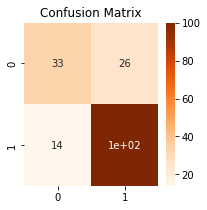

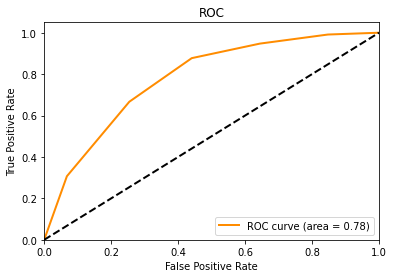

In [78]:
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf_original = KNeighborsClassifier()
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
print(metrics.classification_report(y_test,y_pred_original))

cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_original))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Oranges')
plt.title('Confusion Matrix')
plt.show()



y_scores = clf_original.predict_proba(X_test)
# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1])
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [79]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf_original = KNeighborsClassifier()

cm_original = []
accuracy_original = []
recall_original = []
precision_original = []
roc_auc_original = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf_original.fit(X_train, y_train)

    y_pred_original = clf_original.predict(X_test)

    cm_original.append(metrics.confusion_matrix(y_test, y_pred_original))
    accuracy_original.append(metrics.accuracy_score(y_test, y_pred_original))
    recall_original.append(metrics.recall_score(y_test, y_pred_original, average='weighted'))
    precision_original.append(metrics.precision_score(y_test, y_pred_original, average='weighted'))
    roc_auc_original.append(metrics.roc_auc_score(y_test, y_pred_original, average='weighted'))



mean_accuracy = np.mean(accuracy_original)
mean_recall = np.mean(recall_original)
mean_precision = np.mean(precision_original)
mean_roc_auc = np.mean(roc_auc_original)


print("recalls for all folds:", recall_original)
table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)

recalls for all folds: [0.8057553956834532, 0.7101449275362319, 0.717391304347826, 0.7681159420289855, 0.7391304347826086]
+-------------------+-------------------+-------------------+-------------------+
|   Mean Accuracy   |    Mean Recall    |   Mean Precision  |    Mean ROC-AUC   |
+-------------------+-------------------+-------------------+-------------------+
| 0.748107600875821 | 0.748107600875821 | 0.746994124437616 | 0.691659645684021 |
+-------------------+-------------------+-------------------+-------------------+


In [80]:
original_ROC = np.mean(roc_auc_original)


for the default values, we get mean accuracy=0.74 and AUC=0.69

In [81]:

param_grid = {
    'n_neighbors':range(2,20),
    'p': [1,2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights' :['uniform']
}

grid_search = GridSearchCV(estimator=clf_original, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters for ROC-AUC:", best_params)

grid_search = GridSearchCV(estimator=clf_original, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters for accuracy:", best_params)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


Best parameters for ROC-AUC: {'algorithm': 'auto', 'n_neighbors': 18, 'p': 1, 'weights': 'uniform'}
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for accuracy: {'algorithm': 'auto', 'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}


lets visualize the change in n_neighbors for ROC-AUC:

Fitting 5 folds for each of 18 candidates, totalling 90 fits


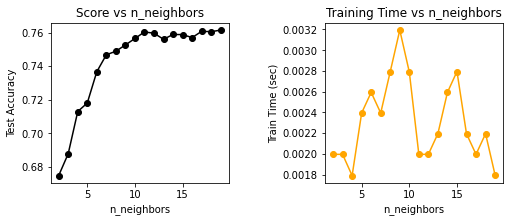

In [82]:
param_grid = {
    'n_neighbors':range(2,20),
}

grid_search = GridSearchCV(estimator=clf_original, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


test_scores = grid_search.cv_results_['mean_test_score']
train_time = grid_search.cv_results_['mean_fit_time']
param_values = list(grid_search.cv_results_['param_n_neighbors'])

plt.subplots(1, 2, figsize=(8, 4))
plt.subplot(121)
plt.plot(param_values, test_scores, 'o-', label='test', color='black')
plt.xlabel('n_neighbors')
plt.ylabel('Test Accuracy')
plt.title('Score vs n_neighbors')

plt.subplot(122)
plt.plot(param_values, train_time, 'o-', color='orange')
plt.xlabel('n_neighbors')
plt.ylabel('Train Time (sec)')
plt.title('Training Time vs n_neighbors')

plt.tight_layout(pad=4)
plt.show()

We can see that the training time is low for the n_neighbors=19 and higher for n_neighbors=18.

We saw that the best results for AUC and accuracy are almost the same, and are different in only the number of neighbors. Since we are more interested in AUC, and the difference in accuracy and training time is very insignificant, we will use n_neighbors=18.

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        48
           1       0.80      0.87      0.83        90

    accuracy                           0.77       138
   macro avg       0.75      0.73      0.73       138
weighted avg       0.76      0.77      0.76       138



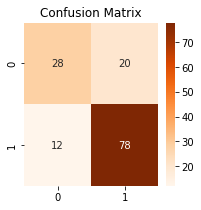

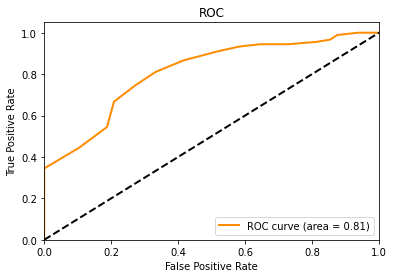

In [83]:
clf_a = KNeighborsClassifier(algorithm='auto', n_neighbors= 18, p= 1, weights= 'uniform')
clf_a.fit(X_train, y_train)
y_pred_original = clf_a.predict(X_test)
print(metrics.classification_report(y_test,y_pred_original))

cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_original))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Oranges')
plt.title('Confusion Matrix')
plt.show()



y_scores = clf_a.predict_proba(X_test)
# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1])
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

cross validation:

In [84]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf_a = KNeighborsClassifier(algorithm='auto', n_neighbors= 18, p= 1, weights= 'uniform')

cm_a = []
accuracy_a = []
recall_a = []
precision_a = []
roc_auc_a = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf_a.fit(X_train, y_train)

    y_pred_a = clf_a.predict(X_test)

    cm_a.append(metrics.confusion_matrix(y_test, y_pred_a))
    accuracy_a.append(metrics.accuracy_score(y_test, y_pred_a))
    recall_a.append(metrics.recall_score(y_test, y_pred_a, average='weighted'))
    precision_a.append(metrics.precision_score(y_test, y_pred_a, average='weighted'))
    roc_auc_a.append(metrics.roc_auc_score(y_test, y_pred_a, average='weighted'))



mean_accuracy = np.mean(accuracy_a)
mean_recall = np.mean(recall_a)
mean_precision = np.mean(precision_a)
mean_roc_auc = np.mean(roc_auc_a)


print("recalls for all folds:", recall_a)
print("precisions for all folds:", precision_a)

table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)

recalls for all folds: [0.7841726618705036, 0.7753623188405797, 0.7463768115942029, 0.717391304347826, 0.7681159420289855]
precisions for all folds: [0.7781580560794084, 0.7745571658615137, 0.7550588383863561, 0.707299771167048, 0.7625554569653948]
+--------------------+--------------------+--------------------+--------------------+
|   Mean Accuracy    |    Mean Recall     |   Mean Precision   |    Mean ROC-AUC    |
+--------------------+--------------------+--------------------+--------------------+
| 0.7582838077364196 | 0.7582838077364196 | 0.7555258576919442 | 0.7150813912652894 |
+--------------------+--------------------+--------------------+--------------------+


We can see that the results are indeed better: ROC-AUC is bigger by 2, and accuracy is also bigger than 1. the mean recall and precision is also ok, meaning that we dont categorize everything to one class.

We can see that the recall is the same (for only one fold that we work on). we will apply SMOTE and try to make it higher:

In [85]:
best_sampling_strategy = None
best_recall_tp = 0.0
best_recall_tn = 0.0

k_neighbors_values = [3, 4, 5, 6, 7]

for sampling_strategy in [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
    for k_neighbors in k_neighbors_values:
        smote_b = SMOTE(sampling_strategy=sampling_strategy, random_state=42, k_neighbors=k_neighbors)
        X_resampled_b, y_resampled_b = smote_b.fit_resample(X, y)
        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_resampled_b, y_resampled_b, test_size=0.25, random_state=42)

        clf_b = KNeighborsClassifier()
        clf_b.fit(X_train_b, y_train_b)
        y_pred_b = clf_b.predict(X_test_b)

        report = metrics.classification_report(y_test_b, y_pred_b, output_dict=True)
        recall_tp = report['1']['recall']
        recall_tn = report['0']['recall']

        if recall_tp > best_recall_tp and recall_tn > best_recall_tn:
            best_recall_tp = recall_tp
            best_recall_tn = recall_tn
            best_sampling_strategy = sampling_strategy
            best_k_neighbors = k_neighbors

print("Best Sampling Strategy:", best_sampling_strategy)
print("Best k_neighbors:", best_k_neighbors)
print("Best Recall TP:", best_recall_tp)
print("Best Recall TN:", best_recall_tn)

Best Sampling Strategy: 0.7
Best k_neighbors: 3
Best Recall TP: 0.8461538461538461
Best Recall TN: 0.6629213483146067


In [86]:
smote_b = SMOTE(sampling_strategy=0.7, random_state=42, k_neighbors=3)
X_resampled_b, y_resampled_b = smote_b.fit_resample(X, y)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_resampled_b, y_resampled_b, test_size=0.25, random_state=42)

clf_b = KNeighborsClassifier()
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict(X_test_b)



param_grid = {
    'n_neighbors':range(2,20),
    'p': [1,2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights' :['uniform']
}

grid_search = GridSearchCV(estimator=clf_b, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train_b, y_train_b)
best_params = grid_search.best_params_
print("Best parameters for ROC-AUC:", best_params)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for ROC-AUC: {'algorithm': 'auto', 'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}


saving it:

              precision    recall  f1-score   support

           0       0.79      0.65      0.72        89
           1       0.74      0.86      0.79       104

    accuracy                           0.76       193
   macro avg       0.77      0.75      0.76       193
weighted avg       0.77      0.76      0.76       193



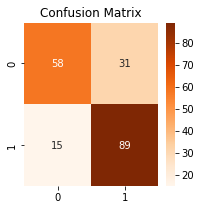

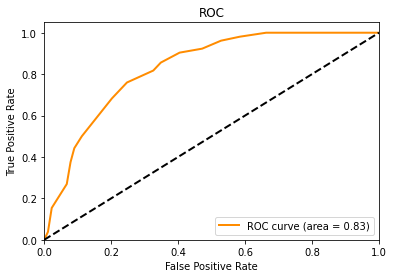

In [87]:
clf_b = KNeighborsClassifier(algorithm='auto', n_neighbors= 19, p= 1, weights= 'uniform')
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict(X_test_b)
print(metrics.classification_report(y_test_b,y_pred_b))

cm = pd.DataFrame(metrics.confusion_matrix(y_test_b, y_pred_b))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Oranges')
plt.title('Confusion Matrix')
plt.show()



y_scores = clf_b.predict_proba(X_test_b)
# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test_b, y_scores[:, 1])
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()





great. now the recall is higher for this one fold. cross-validation:

In [88]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf_b = KNeighborsClassifier(algorithm='auto', n_neighbors= 19, p= 1, weights= 'uniform')

cm_b = []
accuracy_b = []
recall_b = []
precision_b = []
roc_auc_b = []

for train_index, test_index in kf.split(X_resampled_b):
    X_train_b, X_test_b = X_resampled_b.iloc[train_index], X_resampled_b.iloc[test_index]
    y_train_b, y_test_b = y_resampled_b.iloc[train_index], y_resampled_b.iloc[test_index]

    clf_b.fit(X_train_b, y_train_b)

    y_pred_b = clf_b.predict(X_test_b)

    cm_b.append(metrics.confusion_matrix(y_test_b, y_pred_b))
    accuracy_b.append(metrics.accuracy_score(y_test_b, y_pred_b))
    recall_b.append(metrics.recall_score(y_test_b, y_pred_b, average='weighted'))
    precision_b.append(metrics.precision_score(y_test_b, y_pred_b, average='weighted'))
    roc_auc_b.append(metrics.roc_auc_score(y_test_b, y_pred_b, average='weighted'))


mean_accuracy = np.mean(accuracy_b)
mean_recall = np.mean(recall_b)
mean_precision = np.mean(precision_b)
mean_roc_auc = np.mean(roc_auc_b)


print("recalls for all folds:", recall_b)
table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)

recalls for all folds: [0.7741935483870968, 0.6948051948051948, 0.7207792207792207, 0.7402597402597403, 0.7792207792207793]
+--------------------+--------------------+--------------------+--------------------+
|   Mean Accuracy    |    Mean Recall     |   Mean Precision   |    Mean ROC-AUC    |
+--------------------+--------------------+--------------------+--------------------+
| 0.7418516966904063 | 0.7418516966904063 | 0.7428497830446867 | 0.7269498979934418 |
+--------------------+--------------------+--------------------+--------------------+


In [89]:
optimized_ROC=np.mean(roc_auc_b)

We can see that are recalls are higher for all the folds. We also managed to up the ROC-AUC by 1, and accuracy stayed the same (of course, these results are accurate for this specific fold)

Original model ROC-AUC: 0.69
Optimized model ROC-AUC: 0.73
Improvement: 5.10%


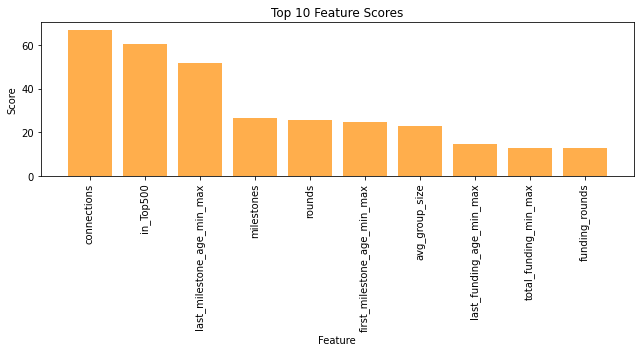

In [90]:

print('Original model ROC-AUC: {:0.2f}'.format(original_ROC))

print('Optimized model ROC-AUC: {:0.2f}'.format(optimized_ROC))

# Calculate improvement
improvement = 100 * (optimized_ROC - original_ROC) / original_ROC
print('Improvement: {:0.2f}%'.format(improvement))



# Perform univariate feature selection
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)

# Get feature scores from the selector
feature_scores = selector.scores_

# Get indices of the top-k features
top_k_indices = feature_scores.argsort()[-10:][::-1]

# Get corresponding feature names and scores
top_k_features = X_train.columns[top_k_indices]
top_k_scores = feature_scores[top_k_indices]

plt.figure(figsize=(9, 5))
plt.bar(range(len(top_k_scores)), top_k_scores, alpha=0.7, color='darkOrange')
plt.xticks(range(len(top_k_scores)), top_k_features, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Top 10 Feature Scores')
plt.tight_layout()
plt.show()


We can see that the kNeighbors classifiers decided that 'connections', 'in_Top500' and 'last_milestone_age_min_max' have the biggest relevance in relation to the target variable, to decide whether the startup succeeds or not

These results are better than the original. the AUC is 0.73 now and accuracy is 0.73 (got a bit lower. but since ROC-AUC is more important, this small change is insignificant) . The model classifies both '0's and '1' good, since the recalls are 0.68 and 0.78 accordingly.
The improvement that we managed to reach is ~5%

Fitting 5 folds for each of 18 candidates, totalling 90 fits


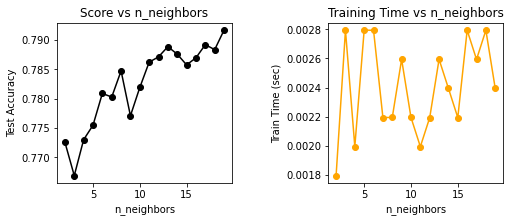

In [91]:
param_grid = {
    'n_neighbors':range(2,20),
}

grid_search = GridSearchCV(estimator=clf_b, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train_b, y_train_b)
best_params = grid_search.best_params_


test_scores = grid_search.cv_results_['mean_test_score']
train_time = grid_search.cv_results_['mean_fit_time']
param_values = list(grid_search.cv_results_['param_n_neighbors'])

plt.subplots(1, 2, figsize=(8, 4))
plt.subplot(121)
plt.plot(param_values, test_scores, 'ko-', label='test')
plt.xlabel('n_neighbors')
plt.ylabel('Test Accuracy')
plt.title('Score vs n_neighbors')

plt.subplot(122)
plt.plot(param_values, train_time, 'o-', color='orange')
plt.xlabel('n_neighbors')
plt.ylabel('Train Time (sec)')
plt.title('Training Time vs n_neighbors')

plt.tight_layout(pad=4)
plt.show()

We can see that the training time for n_neighbors= 19, which is the best value from the previous gridSearch, is low and gives very good score

Conclusion: The final model includes applying SMOTE in order to fix the data imbalance. The
parameters of SMOTE are checked so that the recall will be the lowest.
Afterwards we apply gridSearch in order to find the best hyperparameters for K-Neighbors.

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       256
           1       0.78      0.83      0.80       361

    accuracy                           0.76       617
   macro avg       0.76      0.75      0.75       617
weighted avg       0.76      0.76      0.76       617



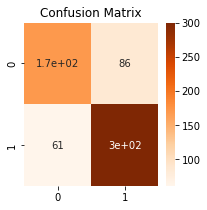

In [92]:
clf_b = KNeighborsClassifier(algorithm='auto', n_neighbors= 19, p= 1, weights= 'uniform')
clf_b.fit(X_train_b, y_train_b)
y_pred_original = clf_b.predict(X_train_b)
print(metrics.classification_report(y_train_b,y_pred_original))



cm = pd.DataFrame(metrics.confusion_matrix(y_train_b, y_pred_original))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Oranges')
plt.title('Confusion Matrix')
plt.show()

We can see that the model doesnt overfit. In fact its results are almost the same as that of the test set


* We chose to use weights= 'uniform' because weights= 'distance' overfits on the training set

## Decision tree

In [93]:
df_numeric = df.select_dtypes(include=[np.number])

In [94]:
df_numeric.to_csv('numeric.csv', index=False)

In [95]:
X = df_numeric.drop('target', axis=1)
y = df_numeric['target']

The first classification model that we will use is a classification tree:

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [97]:
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [98]:
print(f"accuracy of model : {metrics.accuracy_score(y_test, y_pred)}")
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))


accuracy of model : 0.6763005780346821


,0,1
0,32,27
1,29,85


### entropy

We decided to create a decision tree with criterion=entropy first:

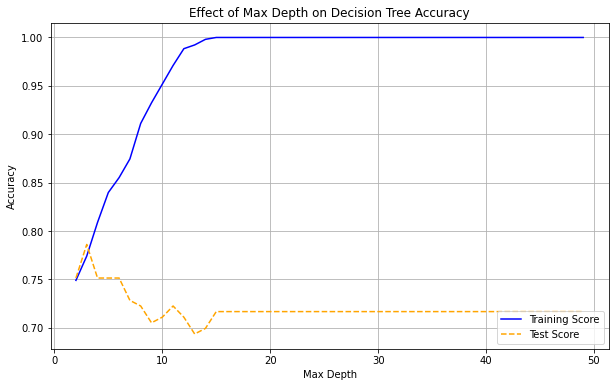

In [99]:
train_scores, test_scores = [], []

for k in range(2, 50):
    clf = DecisionTreeClassifier(criterion='entropy', splitter='best',
                                  max_depth=k, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(2, 50), train_scores, linestyle='-', color='blue')
ax.plot(range(2, 50), test_scores, linestyle='--', color='orange')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy')
ax.set_title('Effect of Max Depth on Decision Tree Accuracy')

ax.legend(['Training Score', 'Test Score'], loc='lower right')
ax.grid()

plt.show()

We will run on different value for max_depth, min_samples_split, min_samples_leaf and find the best option

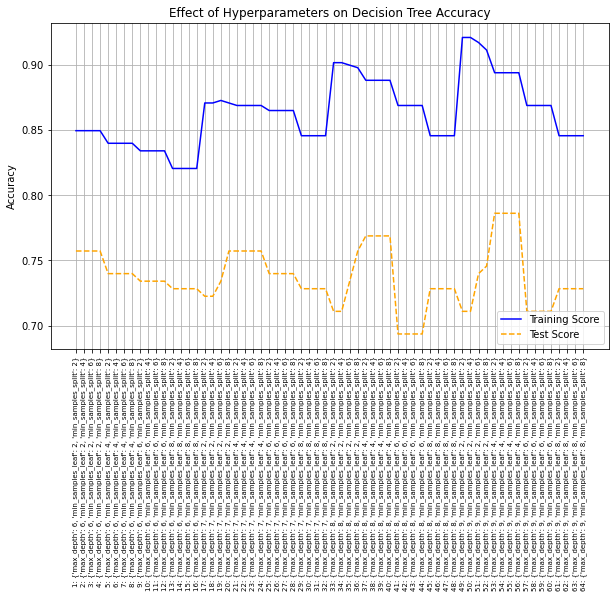

In [100]:
max_depth = [6, 7, 8, 9]
min_samples_split = [2, 4, 6, 8]
min_samples_leaf = [2, 4, 6, 8]
random_grid = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

train_scores, test_scores = [], []

for params in ParameterGrid(random_grid):
    clf = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=42, **params)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(ParameterGrid(random_grid))), train_scores, linestyle='-', color='blue')
ax.plot(range(len(ParameterGrid(random_grid))), test_scores, linestyle='--', color='orange')
ax.set_ylabel('Accuracy')
ax.set_title('Effect of Hyperparameters on Decision Tree Accuracy')
ax.legend(['Training Score', 'Test Score'], loc='lower right')
ax.grid()

# Set x tick labels
x_tick_labels = [f"{i+1}: {str(params)}" for i, params in enumerate(ParameterGrid(random_grid))]
ax.set_xticks(range(len(ParameterGrid(random_grid))))
ax.set_xticklabels(x_tick_labels, rotation=90, size =7)

plt.show()

As we can see, the best values for test score are 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 8 (as we dont want too high of a training score so that we dont overfit)

on test set:

In [101]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=7,
                              min_samples_split=8, min_samples_leaf=2, random_state=42)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

0.7572254335260116


,0,1
0,37,22
1,20,94


on train set:

In [102]:
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

0.8706563706563707


,0,1
0,145,33
1,34,306


In [103]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.2

Please update conda by running

    $ conda update -n base -c defaults conda




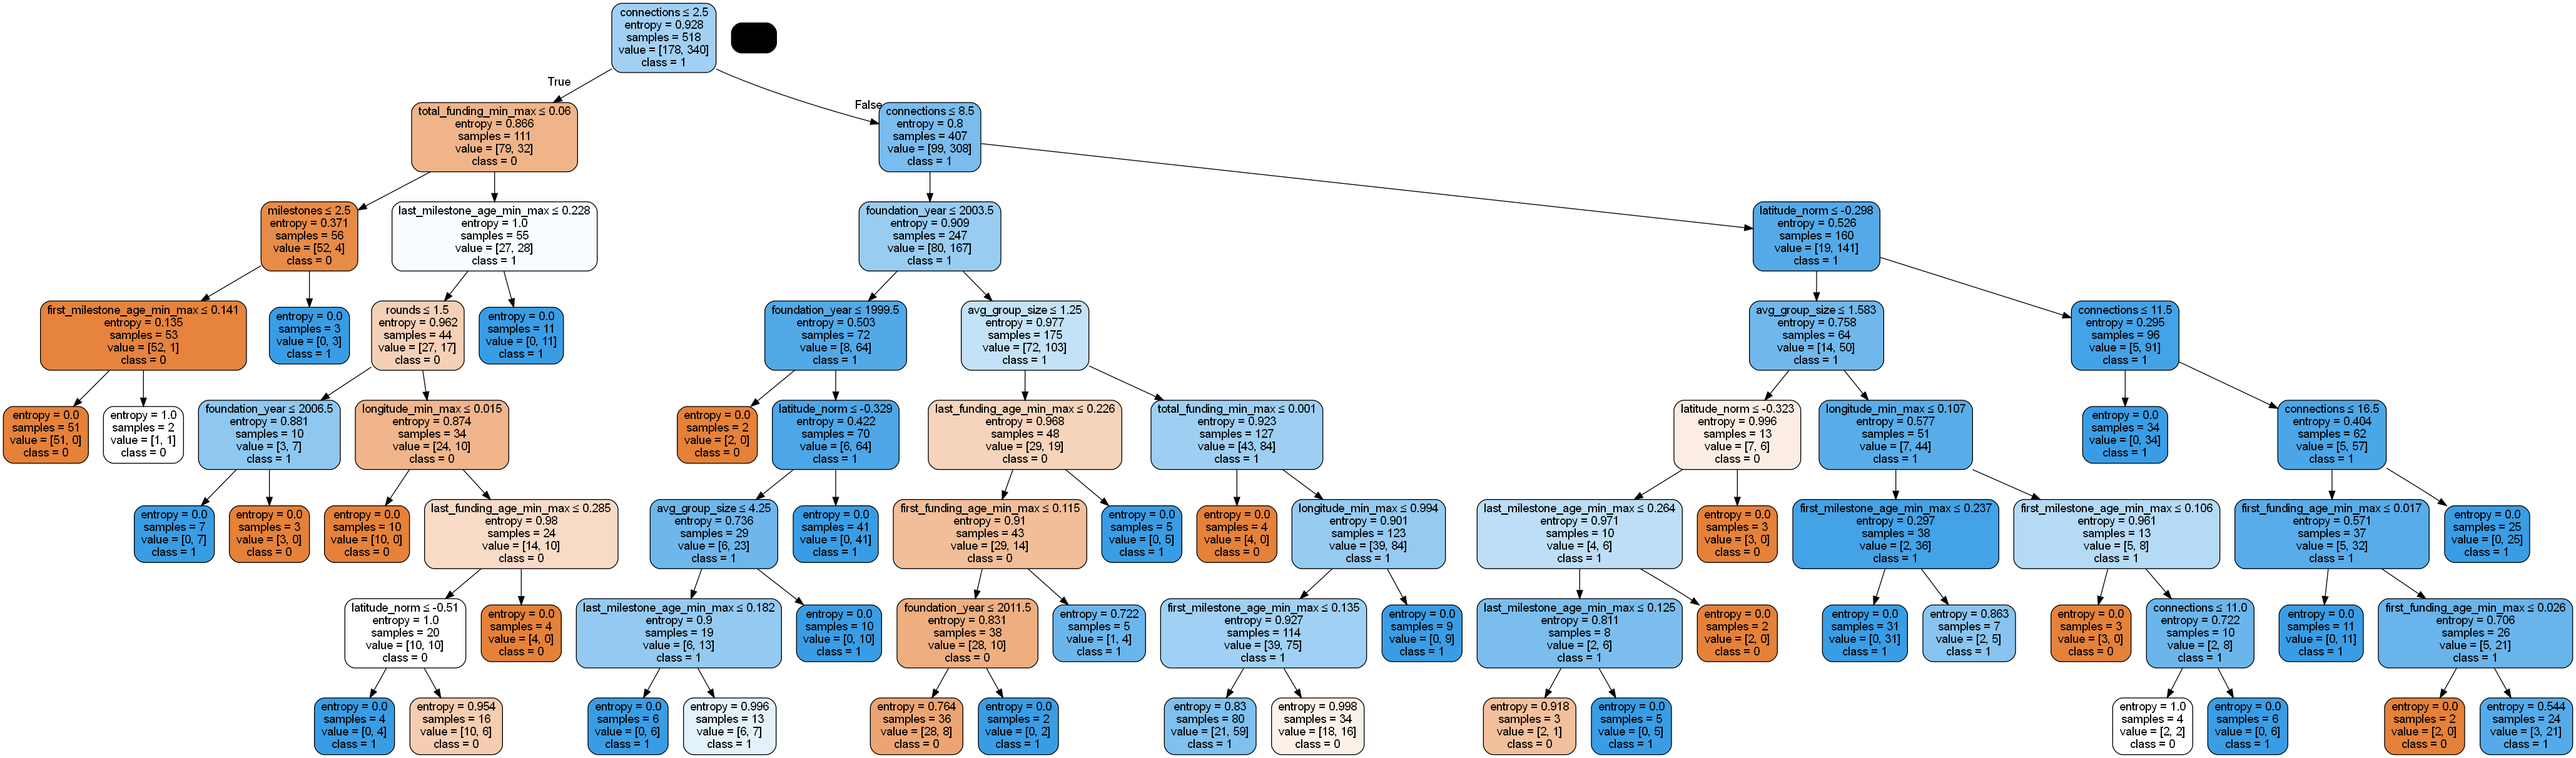

In [104]:
dot = export_graphviz(clf, filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)
graph.write_png('entropy_best.png')
Image(graph.create_png())

Now, we will change categial columns to separate columns, so that each column will correspond to a certain value in the categorial column.
The thresholds will be after each column max number of unique values (expect for those with alot of values...)

In [105]:
for col in  X:
    print(col, len(X[col].unique()))

foundation_day 29
foundation_month 12
foundation_year 16
milestones 7
funding_rounds 9
total_funding_min_max 401
rounds 16
connections 41
avg_group_size 48
in_Top500 2
latitude_norm 508
longitude_min_max 506
first_milestone_age_min_max 343
last_milestone_age_min_max 443
first_funding_age_min_max 471
last_funding_age_min_max 575


In [106]:
thresholds = [3, 8, 10, 13, 20, 24, 30, 42, 50, 200, 300, 400, 500, 600]
dummies_col = []

for threshold in thresholds:
    X_dummies=None
    dummies_col=[]
    for col in df:
        unique_values = len(df[col].unique())
        if 2 < unique_values < threshold:
            dummies_col.append(col)

    X_dummies = pd.get_dummies(data=X, columns=dummies_col)

    X_train_d, X_test_d, y_train, y_test = train_test_split(X_dummies, y, test_size=0.25, random_state=42)

    clf2 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=7,
                                  min_samples_split=2, min_samples_leaf=8, random_state=42)

    clf2 = clf2.fit(X_train_d, y_train)
    y_pred2 = clf2.predict(X_test_d)

    accuracy = metrics.accuracy_score(y_test, y_pred2)
    confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred2))

    print(f"Threshold: {threshold}")
    print("Accuracy Score:", accuracy)
    print("Confusion Matrix:")
    print(confusion_matrix)
    print("-------------------------------------")


Threshold: 3
Accuracy Score: 0.7283236994219653
Confusion Matrix:
    0   1
0  33  26
1  21  93
-------------------------------------
Threshold: 8
Accuracy Score: 0.7341040462427746
Confusion Matrix:
    0   1
0  33  26
1  20  94
-------------------------------------
Threshold: 10
Accuracy Score: 0.7341040462427746
Confusion Matrix:
    0   1
0  33  26
1  20  94
-------------------------------------
Threshold: 13
Accuracy Score: 0.7283236994219653
Confusion Matrix:
    0   1
0  33  26
1  21  93
-------------------------------------
Threshold: 20
Accuracy Score: 0.7803468208092486
Confusion Matrix:
    0   1
0  37  22
1  16  98
-------------------------------------
Threshold: 24
Accuracy Score: 0.7803468208092486
Confusion Matrix:
    0   1
0  37  22
1  16  98
-------------------------------------
Threshold: 30
Accuracy Score: 0.7745664739884393
Confusion Matrix:
    0   1
0  36  23
1  16  98
-------------------------------------
Threshold: 42
Accuracy Score: 0.7225433526011561
Confusio

We can see that the best results are for threshold 20. We will save it for cross-validation later:

In [107]:
dummies_col = []
X_dummies=None
for col in df:
    unique_values = len(df[col].unique())
    if 2 < unique_values < 20:
        dummies_col.append(col)

X_dummies = pd.get_dummies(data=X, columns=dummies_col)


In [108]:
X_train_d, X_test_d, y_train, y_test = train_test_split(X_dummies, y, test_size=0.25, random_state=42)
# clf_E_20= clf, entropy, threshold=20
clf_E_20 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=7,
                              min_samples_split=2, min_samples_leaf=8, random_state=42)

clf_E_20 = clf_E_20.fit(X_train_d,y_train)

y_pred2 = clf_E_20.predict(X_test_d)
print(metrics.accuracy_score(y_test, y_pred2))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred2))

0.7803468208092486


,0,1
0,37,22
1,16,98


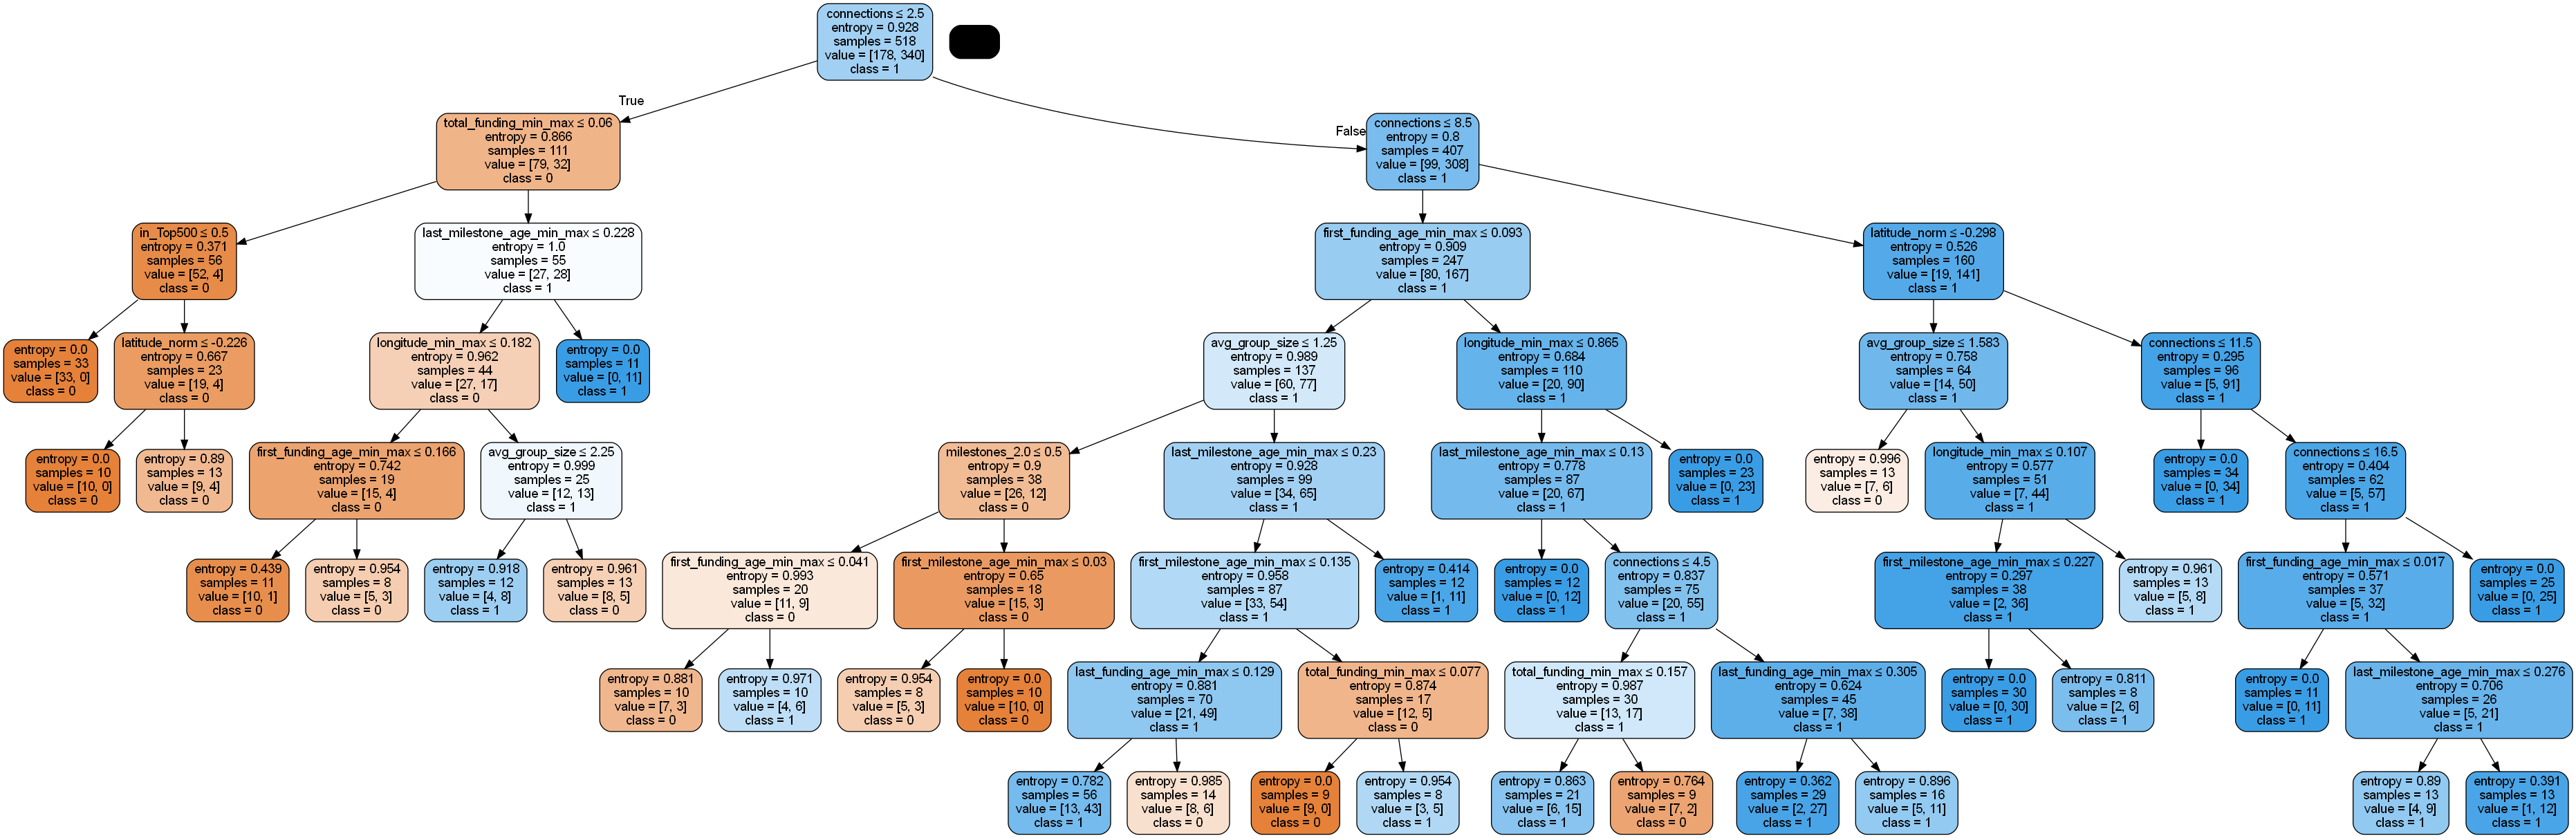

In [109]:
dot = export_graphviz(clf_E_20, filled=True, rounded=True,
                special_characters=True,feature_names = X_dummies.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)
graph.write_png('tree_clf_E_20.png')
Image(graph.create_png())

### gini

now we will do the same thing for gini:

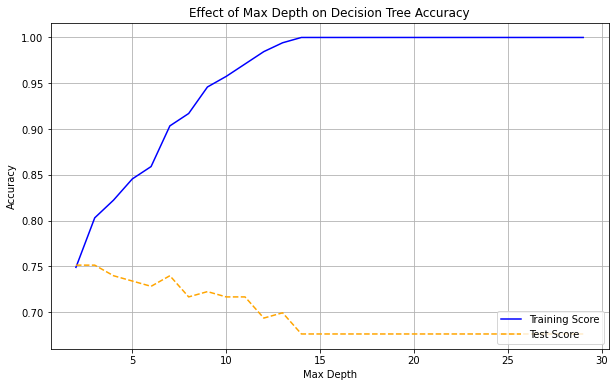

In [110]:
train_scores, test_scores = [], []

for k in range(2, 30):
    clf = DecisionTreeClassifier(criterion='gini', splitter='best',
                                  max_depth=k, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(2, 30), train_scores, linestyle='-', color='blue')
ax.plot(range(2, 30), test_scores, linestyle='--', color='orange')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy')
ax.set_title('Effect of Max Depth on Decision Tree Accuracy')
ax.legend(['Training Score', 'Test Score'], loc='lower right')
ax.grid()
plt.show()

We can see that the highest values that we get are for k=6/7/8 giving us an accuracy of ~0.77

Now we will give max_depth values 6,7,8,9, and min_samples_split values 2,4,6,8 (we noticed that min_samples_split gets the score lower)

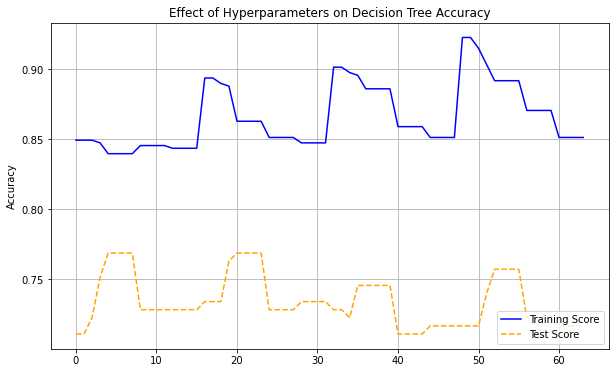

Best Test Score: 0.7687861271676301
Best Parameters: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [111]:
random_grid = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}

train_scores, test_scores = [], []
best_test_score = 0
best_params = {}

# Iterate through all combinations of hyperparameters
for params in ParameterGrid(random_grid):
    clf3 = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=42, **params)
    clf3.fit(X_train, y_train)

    train_score = clf3.score(X_train, y_train)
    test_score = clf3.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

    if test_score > best_test_score:
        best_test_score = test_score
        best_params = params

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(ParameterGrid(random_grid))), train_scores, linestyle='-', color='blue')
ax.plot(range(len(ParameterGrid(random_grid))), test_scores, linestyle='--', color='orange')
ax.set_ylabel('Accuracy')
ax.set_title('Effect of Hyperparameters on Decision Tree Accuracy')
ax.legend(['Training Score', 'Test Score'], loc='lower right')
ax.grid()
plt.show()

print("Best Test Score:", best_test_score)
print("Best Parameters:", best_params)

we will take the values of max_depth=6, min_samples_leaf=4, min_samples_split=2

In [112]:
clf3 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6,
                              min_samples_leaf =4, min_samples_split= 2, random_state=42)

clf3 = clf3.fit(X_train,y_train)

y_pred = clf3.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

0.7687861271676301


,0,1
0,33,26
1,14,100


In [113]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)


cm_original = []
accuracy_original = []
recall_original = []
precision_original = []
roc_auc_original = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf3.fit(X_train, y_train)

    y_pred_original = clf3.predict(X_test)

    cm_original.append(metrics.confusion_matrix(y_test, y_pred_original))
    accuracy_original.append(metrics.accuracy_score(y_test, y_pred_original))
    recall_original.append(metrics.recall_score(y_test, y_pred_original, average='weighted'))
    precision_original.append(metrics.precision_score(y_test, y_pred_original, average='weighted'))
    roc_auc_original.append(metrics.roc_auc_score(y_test, y_pred_original, average='weighted'))



mean_accuracy = np.mean(accuracy_original)
mean_recall = np.mean(recall_original)
mean_precision = np.mean(precision_original)
mean_roc_auc = np.mean(roc_auc_original)


print("recalls for all folds:", recall_original)
table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)

original_ROC=np.mean(roc_auc_original)

recalls for all folds: [0.7697841726618705, 0.6884057971014492, 0.7608695652173914, 0.6739130434782609, 0.7391304347826086]
+-------------------+-------------------+--------------------+--------------------+
|   Mean Accuracy   |    Mean Recall    |   Mean Precision   |    Mean ROC-AUC    |
+-------------------+-------------------+--------------------+--------------------+
| 0.726420602648316 | 0.726420602648316 | 0.7221332216577896 | 0.6763397590480696 |
+-------------------+-------------------+--------------------+--------------------+


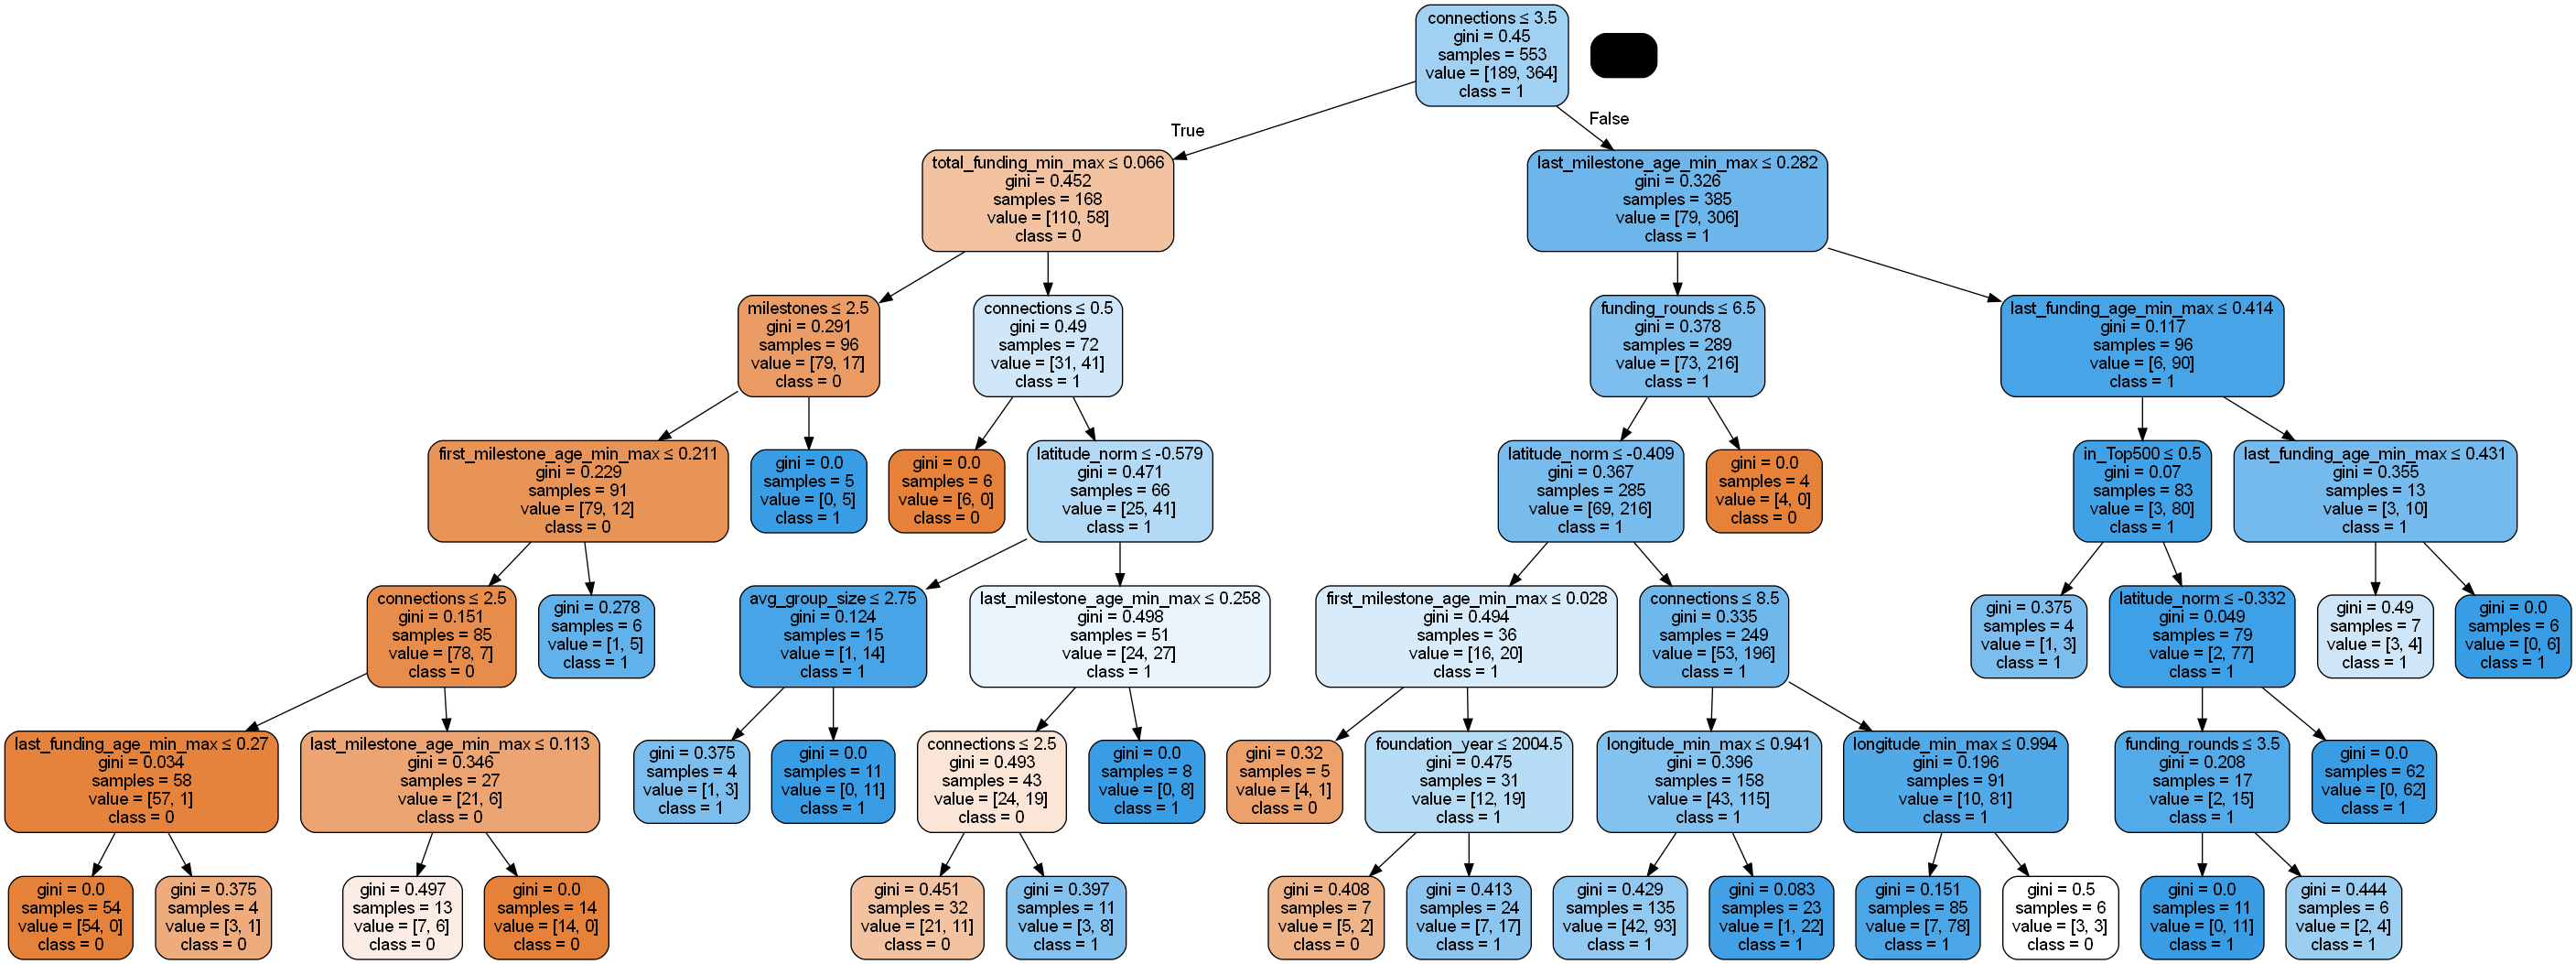

In [114]:
dot = export_graphviz(clf3, filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)
graph.write_png('gini_best.png')
Image(graph.create_png())

Now, we will change categial columns to separate columns, so that each column will correspond to a certain value in the categorial column.
The thresholds will be after each column max number of unique values (expect for those with alot of values...)

In [115]:
for col in  X:
    print(col, len(X[col].unique()))

foundation_day 29
foundation_month 12
foundation_year 16
milestones 7
funding_rounds 9
total_funding_min_max 401
rounds 16
connections 41
avg_group_size 48
in_Top500 2
latitude_norm 508
longitude_min_max 506
first_milestone_age_min_max 343
last_milestone_age_min_max 443
first_funding_age_min_max 471
last_funding_age_min_max 575


In [116]:
thresholds = [3, 8, 10, 13,20,  24,  30, 42, 50, 600]
dummies_col = []

for threshold in thresholds:
    X_dummies=None
    dummies_col=[]
    for col in X:
        unique_values = len(X[col].unique())
        if 2 < unique_values < threshold:
            dummies_col.append(col)

    X_dummies = pd.get_dummies(data=X, columns=dummies_col)

    X_train_d, X_test_d, y_train, y_test = train_test_split(X_dummies, y, test_size=0.25, random_state=42)

    clf2 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6,
                                  min_samples_leaf= 4,min_samples_split=2, random_state=42)

    clf2 = clf2.fit(X_train_d, y_train)
    y_pred3 = clf2.predict(X_test_d)

    accuracy = metrics.accuracy_score(y_test, y_pred3)
    confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred3))

    print(f"Threshold: {threshold}")
    print("Accuracy Score:", accuracy)
    print("Confusion Matrix:")
    print(confusion_matrix)
    print("-------------------------------------")


Threshold: 3
Accuracy Score: 0.7687861271676301
Confusion Matrix:
    0    1
0  33   26
1  14  100
-------------------------------------
Threshold: 8
Accuracy Score: 0.7630057803468208
Confusion Matrix:
    0    1
0  32   27
1  14  100
-------------------------------------
Threshold: 10
Accuracy Score: 0.7687861271676301
Confusion Matrix:
    0    1
0  33   26
1  14  100
-------------------------------------
Threshold: 13
Accuracy Score: 0.7687861271676301
Confusion Matrix:
    0    1
0  33   26
1  14  100
-------------------------------------
Threshold: 20
Accuracy Score: 0.7398843930635838
Confusion Matrix:
    0   1
0  30  29
1  16  98
-------------------------------------
Threshold: 24
Accuracy Score: 0.7398843930635838
Confusion Matrix:
    0   1
0  30  29
1  16  98
-------------------------------------
Threshold: 30
Accuracy Score: 0.7630057803468208
Confusion Matrix:
    0   1
0  34  25
1  16  98
-------------------------------------
Threshold: 42
Accuracy Score: 0.7572254335260

We can see that the best results are for threshold 8,10,13 but we prefer to take the smallest one (not including 3, because the splits are way too minimal)

In [117]:
dummies_col = []
X_dummies=None
for col in df:
    unique_values = len(df[col].unique())
    if 2 < unique_values < 8:
        dummies_col.append(col)

X_dummies = pd.get_dummies(data=X, columns=dummies_col)


In [118]:
X_train_d, X_test_d, y_train, y_test = train_test_split(X_dummies, y, test_size=0.25, random_state=42)
# clf_G_8= clf, gini, threshold=8
clf_G_8 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6,
                              min_samples_leaf=4, min_samples_split=2, random_state=42)

clf_G_8 = clf_G_8.fit(X_train_d,y_train)

y_pred2 = clf_G_8.predict(X_test_d)
print(metrics.accuracy_score(y_test, y_pred2))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred2))

0.7630057803468208


,0,1
0,32,27
1,14,100


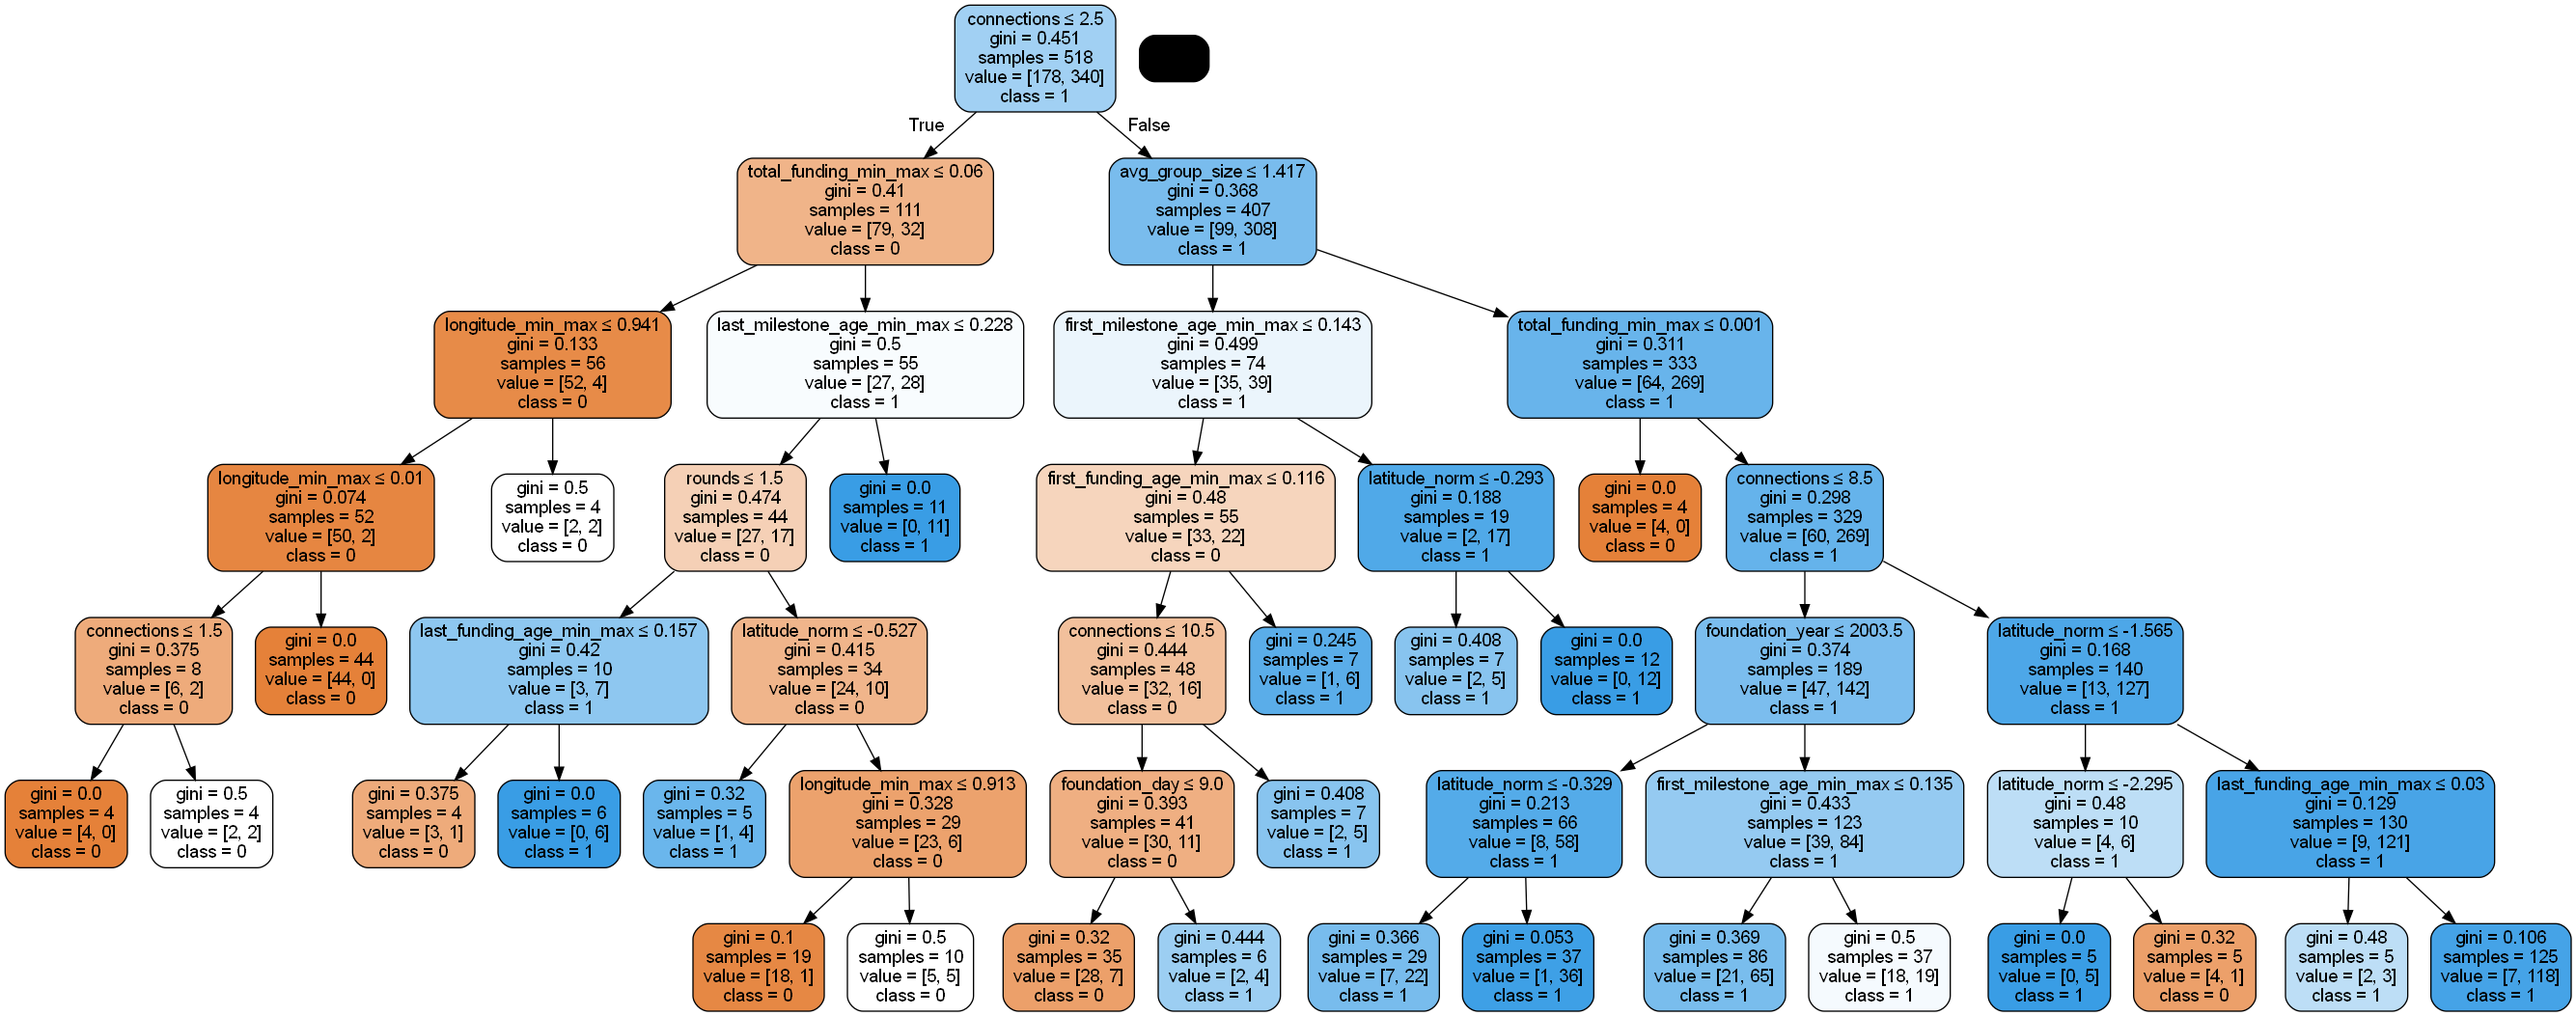

In [119]:
dot = export_graphviz(clf_G_8, filled=True, rounded=True,
                special_characters=True,feature_names = X_dummies.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)
graph.write_png('clf_G_8.png')
Image(graph.create_png())

### comparison

Now, when we have our 2 best decision trees (1 for entropy, 1 for gini. the tress are: clf_E_20, clf_G_8) we will use cross-validation:

In [120]:
X = df.drop('target', axis=1)
y = df['target']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [122]:
X = X.to_numpy()
X_dummies = X_dummies.to_numpy()


In [123]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8,
                              min_samples_split=2, min_samples_leaf=2, random_state=42)


In [124]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cm_a, cm_b = [], []
accuracy_a, accuracy_b = [], []
recall_a, recall_b = [], []
precision_a, precision_b = [], []

for train_index, test_index in kf.split(X_dummies):
    X_train_d, X_test_d = X[train_index], X[test_index]
    y_train_d, y_test_d = y[train_index], y[test_index]
    clf_E_20.fit(X_train_d, y_train_d)
    clf_G_8.fit(X_train_d, y_train_d)

    y_pred_a = clf_E_20.predict(X_test_d)
    y_pred_b = clf_G_8.predict(X_test_d)

    cm_a.append(metrics.confusion_matrix(y_test_d, y_pred_a))
    cm_b.append(metrics.confusion_matrix(y_test_d, y_pred_b))
    accuracy_a.append(metrics.accuracy_score(y_test_d, y_pred_a))
    accuracy_b.append(metrics.accuracy_score(y_test_d, y_pred_b))
    recall_a.append(metrics.recall_score(y_test_d, y_pred_a, average='weighted'))
    recall_b.append(metrics.recall_score(y_test_d, y_pred_b, average='weighted'))
    precision_a.append(metrics.precision_score(y_test_d, y_pred_a, average='weighted'))
    precision_b.append(metrics.precision_score(y_test_d, y_pred_b, average='weighted'))

In [125]:
results = {
    'Accuracy_clf_E_20': accuracy_a,
    'Accuracy_clf_G_8': accuracy_b,

    'Recall_clf_E_20': recall_a,
    'Recall_clf_G_8': recall_b,

    'Precision_clf_E_20': precision_a,
    'Precision_clf_G_8': precision_b,
}

results_df = pd.DataFrame(results)
mean_results = results_df.mean().to_frame().T
mean_results.index = ['Mean']
results_df = pd.concat([results_df, mean_results])
results_df

,Accuracy_clf_E_20,Accuracy_clf_G_8,Recall_clf_E_20,Recall_clf_G_8,Precision_clf_E_20,Precision_clf_G_8
0,0.769784,0.769784,0.769784,0.769784,0.773970,0.764434
1,0.739130,0.688406,0.739130,0.688406,0.736478,0.680471
2,0.695652,0.760870,0.695652,0.760870,0.692072,0.751001
3,0.717391,0.673913,0.717391,0.673913,0.709006,0.682906
4,0.717391,0.739130,0.717391,0.739130,0.711458,0.731854
Mean,0.727870,0.726421,0.727870,0.726421,0.724597,0.722133


on training set:

In [126]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cm_a, cm_b = [], []
accuracy_a, accuracy_b = [], []
recall_a, recall_b = [], []
precision_a, precision_b = [], []

for train_index, test_index in kf.split(X_dummies):
    X_train_d, X_test_d = X[train_index], X[test_index]
    y_train_d, y_test_d = y[train_index], y[test_index]
    clf_E_20.fit(X_train_d, y_train_d)
    clf_G_8.fit(X_train_d, y_train_d)

    y_pred_a = clf_E_20.predict(X_train_d)
    y_pred_b = clf_G_8.predict(X_train_d)

    cm_a.append(metrics.confusion_matrix(y_train_d, y_pred_a))
    cm_b.append(metrics.confusion_matrix(y_train_d, y_pred_b))
    accuracy_a.append(metrics.accuracy_score(y_train_d, y_pred_a))
    accuracy_b.append(metrics.accuracy_score(y_train_d, y_pred_b))
    recall_a.append(metrics.recall_score(y_train_d, y_pred_a, average='weighted'))
    recall_b.append(metrics.recall_score(y_train_d, y_pred_b, average='weighted'))
    precision_a.append(metrics.precision_score(y_train_d, y_pred_a, average='weighted'))
    precision_b.append(metrics.precision_score(y_train_d, y_pred_b, average='weighted'))

In [127]:
results = {
    'Accuracy_clf_E_20': accuracy_a,
    'Accuracy_clf_G_8': accuracy_b,

    'Recall_clf_E_20': recall_a,
    'Recall_clf_G_8': recall_b,

    'Precision_clf_E_20': precision_a,
    'Precision_clf_G_8': precision_b,
}

results_df = pd.DataFrame(results)
mean_results = results_df.mean().to_frame().T
mean_results.index = ['Mean']
results_df = pd.concat([results_df, mean_results])
results_df

,Accuracy_clf_E_20,Accuracy_clf_G_8,Recall_clf_E_20,Recall_clf_G_8,Precision_clf_E_20,Precision_clf_G_8
0,0.807971,0.820652,0.807971,0.820652,0.821560,0.823738
1,0.860759,0.878843,0.860759,0.878843,0.859693,0.877689
2,0.837251,0.840868,0.837251,0.840868,0.836099,0.844071
3,0.848101,0.867993,0.848101,0.867993,0.847076,0.866782
4,0.831826,0.833635,0.831826,0.833635,0.831992,0.833726
Mean,0.837182,0.848398,0.837182,0.848398,0.839284,0.849201


Since the point of the project is to predict whether the startup will succeed or not, then accuracy is the most important metric. The reason for that is, that we dont care whether we "miss a good startup" or "believe in a failed startup", since the project doesnt ask about that. Thats why we will use accuracy

We believe that the model overfits, but couldnt figure out where. Also the results for acccuracy are low.In that case we will use different models (and compare ROC-AUC)

## Random Forest

              precision    recall  f1-score   support

           0       0.74      0.58      0.65        59
           1       0.80      0.89      0.85       114

    accuracy                           0.79       173
   macro avg       0.77      0.74      0.75       173
weighted avg       0.78      0.79      0.78       173



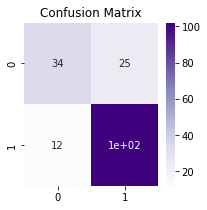

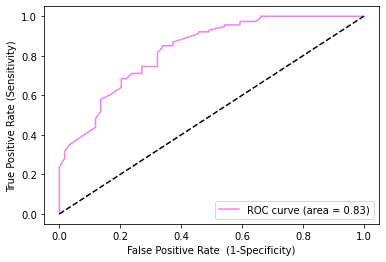

In [128]:

X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


clf_original = RandomForestClassifier()
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
print(metrics.classification_report(y_test,y_pred_original))

cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_original))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Purples')
plt.title('Confusion Matrix')
plt.show()

y_probs_original = clf_original.predict_proba(X_test) # probability prediction
fpr, tpr, _ = metrics.roc_curve(y_test, y_probs_original[:,1])
auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='violet', label='ROC curve (area = %0.2f)' %  auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

cross validation:

In [129]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
clf_original = RandomForestClassifier()

cm_original = []
accuracy_original = []
recall_original = []
precision_original = []
roc_auc_original = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf_original.fit(X_train, y_train)

    y_pred_original = clf_original.predict(X_test)

    cm_original.append(metrics.confusion_matrix(y_test, y_pred_original))
    accuracy_original.append(metrics.accuracy_score(y_test, y_pred_original))
    recall_original.append(metrics.recall_score(y_test, y_pred_original, average='weighted'))
    precision_original.append(metrics.precision_score(y_test, y_pred_original, average='weighted'))
    roc_auc_original.append(metrics.roc_auc_score(y_test, y_pred_original, average='weighted'))


mean_accuracy = np.mean(accuracy_original)
mean_recall = np.mean(recall_original)
mean_precision = np.mean(precision_original)
mean_roc_auc = np.mean(roc_auc_original)

print("recalls for all folds:", recall_original)
print("precisions for all folds:", precision_original)

table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)

recalls for all folds: [0.7841726618705036, 0.7608695652173914, 0.782608695652174, 0.7898550724637681, 0.782608695652174]
precisions for all folds: [0.7781580560794084, 0.765756948365644, 0.7752311626991933, 0.7850839054157132, 0.7801987015542002]
+--------------------+--------------------+--------------------+--------------------+
|   Mean Accuracy    |    Mean Recall     |   Mean Precision   |    Mean ROC-AUC    |
+--------------------+--------------------+--------------------+--------------------+
| 0.7800229381712022 | 0.7800229381712022 | 0.7768857548228318 | 0.7253999076216581 |
+--------------------+--------------------+--------------------+--------------------+


We can see high values for accuracy, recall and precision. however, ROC-AUC, the most important measurement is lower.

In [130]:
original_ROC=np.mean(roc_auc_original)

grid search:
*   The fitting is very very very slow so I would recommend not to run it...
*   n_estimators is the number of trees built. this takes most of the time, so I decided to leave it at 100
*   We didnt take a lot of different values because the run time is super long






In [131]:
param_grid = {
    'n_estimators': [100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}


grid_search = GridSearchCV(estimator=clf_original, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters for ROC-AUC:", best_params)

grid_search = GridSearchCV(estimator=clf_original, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters for accuracy:", best_params)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


Best parameters for ROC-AUC: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters for accuracy: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [132]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
clf_original = RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2', min_samples_leaf=2, min_samples_split=2, n_estimators=100)

cm_original = []
accuracy_original = []
recall_original = []
precision_original = []
roc_auc_original = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf_original.fit(X_train, y_train)

    y_pred_original = clf_original.predict(X_test)

    cm_original.append(metrics.confusion_matrix(y_test, y_pred_original))
    accuracy_original.append(metrics.accuracy_score(y_test, y_pred_original))
    recall_original.append(metrics.recall_score(y_test, y_pred_original, average='weighted'))
    precision_original.append(metrics.precision_score(y_test, y_pred_original, average='weighted'))
    roc_auc_original.append(metrics.roc_auc_score(y_test, y_pred_original, average='weighted'))


mean_accuracy = np.mean(accuracy_original)
mean_recall = np.mean(recall_original)
mean_precision = np.mean(precision_original)
mean_roc_auc = np.mean(roc_auc_original)

print("recalls for all folds:", recall_original)
print("precisions for all folds:", precision_original)

table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)

recalls for all folds: [0.7769784172661871, 0.7898550724637681, 0.8115942028985508, 0.7898550724637681, 0.7753623188405797]
precisions for all folds: [0.7741413139081212, 0.8123690448353805, 0.8100912506709609, 0.7867114236999148, 0.7728213815170337]
+--------------------+--------------------+--------------------+--------------------+
|   Mean Accuracy    |    Mean Recall     |   Mean Precision   |    Mean ROC-AUC    |
+--------------------+--------------------+--------------------+--------------------+
| 0.7887290167865707 | 0.7887290167865707 | 0.7912268829262821 | 0.7246956935545245 |
+--------------------+--------------------+--------------------+--------------------+


The results stayed pretty much the same.

We will first apply SMOTE:

In [133]:
best_sampling_strategy = None
best_recall_tp = 0.0
best_recall_tn = 0.0

k_neighbors_values = [3, 4, 5, 6, 7]

for sampling_strategy in [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
    for k_neighbors in k_neighbors_values:
        smote_b = SMOTE(sampling_strategy=sampling_strategy, random_state=42, k_neighbors=k_neighbors)
        X_resampled_b, y_resampled_b = smote_b.fit_resample(X, y)
        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_resampled_b, y_resampled_b, test_size=0.25, random_state=42)

        clf_b = RandomForestClassifier()
        clf_b.fit(X_train_b, y_train_b)
        y_pred_b = clf_b.predict(X_test_b)

        report = metrics.classification_report(y_test_b, y_pred_b, output_dict=True)
        recall_tp = report['1']['recall']
        recall_tn = report['0']['recall']

        if recall_tp > best_recall_tp and recall_tn > best_recall_tn:
            best_recall_tp = recall_tp
            best_recall_tn = recall_tn
            best_sampling_strategy = sampling_strategy
            best_k_neighbors = k_neighbors

print("Best Sampling Strategy:", best_sampling_strategy)
print("Best k_neighbors:", best_k_neighbors)
print("Best Recall TP:", best_recall_tp)
print("Best Recall TN:", best_recall_tn)

Best Sampling Strategy: 0.6
Best k_neighbors: 6
Best Recall TP: 0.9439252336448598
Best Recall TN: 0.5733333333333334


and now we will run a grid search:
*   a big max_depth causes overfitting, so we will use only small values



In [134]:
smote_b = SMOTE(sampling_strategy=0.7, random_state=42, k_neighbors=5)
X_resampled_b, y_resampled_b = smote_b.fit_resample(X, y)
rus_b = RandomUnderSampler(sampling_strategy=0.9, random_state=42)
X_resampled_b, y_resampled_b = rus_b.fit_resample(X_resampled_b, y_resampled_b)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_resampled_b, y_resampled_b, test_size=0.25, random_state=42)

clf_b = RandomForestClassifier()
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict(X_test_b)

param_grid = {
    'n_estimators': [100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=clf_b, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train_b, y_train_b)
best_params = grid_search.best_params_
print("Best parameters for ROC-AUC:", best_params)


grid_search = GridSearchCV(estimator=clf_b, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_b, y_train_b)
best_params = grid_search.best_params_
print("Best parameters for accuracy:", best_params)



Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters for ROC-AUC: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters for accuracy: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}


              precision    recall  f1-score   support

           0       0.81      0.70      0.75        83
           1       0.74      0.84      0.78        85

    accuracy                           0.77       168
   macro avg       0.77      0.77      0.77       168
weighted avg       0.77      0.77      0.77       168



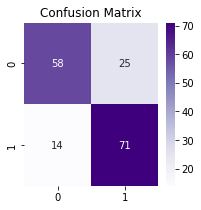

In [135]:
clf_b = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2', min_samples_leaf=3, min_samples_split=4, n_estimators=100)
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict(X_test_b)
print(metrics.classification_report(y_test_b,y_pred_b))

cm = pd.DataFrame(metrics.confusion_matrix(y_test_b, y_pred_b))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Purples')
plt.title('Confusion Matrix')
plt.show()





In [136]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
clf_b = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2', min_samples_leaf=3, min_samples_split=4, n_estimators=100)

cm_b = []
accuracy_b = []
recall_b = []
precision_b = []
roc_auc_b = []

for train_index, test_index in kf.split(X_resampled_b):
    X_train_b, X_test_b = X_resampled_b.iloc[train_index], X_resampled_b.iloc[test_index]
    y_train_b, y_test_b = y_resampled_b.iloc[train_index], y_resampled_b.iloc[test_index]

    clf_b.fit(X_train_b, y_train_b)

    y_pred_b = clf_b.predict(X_test_b)

    cm_b.append(metrics.confusion_matrix(y_test_b, y_pred_b))
    accuracy_b.append(metrics.accuracy_score(y_test_b, y_pred_b))
    recall_b.append(metrics.recall_score(y_test_b, y_pred_b, average='weighted'))
    precision_b.append(metrics.precision_score(y_test_b, y_pred_b, average='weighted'))
    roc_auc_b.append(metrics.roc_auc_score(y_test_b, y_pred_b, average='weighted'))


mean_accuracy = np.mean(accuracy_b)
mean_recall = np.mean(recall_b)
mean_precision = np.mean(precision_b)
mean_roc_auc = np.mean(roc_auc_b)


print("recalls for all folds:", recall_b)
table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)
best_roc_auc = np.mean(roc_auc_b)


recalls for all folds: [0.7686567164179104, 0.753731343283582, 0.746268656716418, 0.7686567164179104, 0.8195488721804511]
+--------------------+--------------------+--------------------+--------------------+
|   Mean Accuracy    |    Mean Recall     |   Mean Precision   |    Mean ROC-AUC    |
+--------------------+--------------------+--------------------+--------------------+
| 0.7713724610032544 | 0.7713724610032544 | 0.7800341016898416 | 0.7649719680075847 |
+--------------------+--------------------+--------------------+--------------------+


lets check overfitting on training set:

In [137]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf_b = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2', min_samples_leaf=3, min_samples_split=4, n_estimators=100)

cm_b = []
accuracy_b = []
recall_b = []
precision_b = []
roc_auc_b = []

for train_index, test_index in kf.split(X_resampled_b):
    X_train_b, X_test_b = X_resampled_b.iloc[train_index], X_resampled_b.iloc[test_index]
    y_train_b, y_test_b = y_resampled_b.iloc[train_index], y_resampled_b.iloc[test_index]

    clf_b.fit(X_train_b, y_train_b)

    y_pred_b = clf_b.predict(X_train_b)

    cm_b.append(metrics.confusion_matrix(y_train_b, y_pred_b))
    accuracy_b.append(metrics.accuracy_score(y_train_b, y_pred_b))
    recall_b.append(metrics.recall_score(y_train_b, y_pred_b, average='weighted'))
    precision_b.append(metrics.precision_score(y_train_b, y_pred_b, average='weighted'))
    roc_auc_b.append(metrics.roc_auc_score(y_train_b, y_pred_b, average='weighted'))


mean_accuracy = np.mean(accuracy_b)
mean_recall = np.mean(recall_b)
mean_precision = np.mean(precision_b)
mean_roc_auc = np.mean(roc_auc_b)


print("recalls for all folds:", recall_b)
table = PrettyTable()
table.field_names = ["Mean Accuracy", "Mean Recall", "Mean Precision", "Mean ROC-AUC"]
table.add_row([mean_accuracy, mean_recall, mean_precision, mean_roc_auc])
print(table)



recalls for all folds: [0.8523364485981308, 0.8467289719626169, 0.8467289719626169, 0.8504672897196262, 0.8246268656716418]
+--------------------+--------------------+--------------------+-------------------+
|   Mean Accuracy    |    Mean Recall     |   Mean Precision   |    Mean ROC-AUC   |
+--------------------+--------------------+--------------------+-------------------+
| 0.8441777095829265 | 0.8441777095829265 | 0.8537884975101271 | 0.838877471553452 |
+--------------------+--------------------+--------------------+-------------------+


doesnt overfit.

now, lets check how much the model has improved:

In [138]:
print('Original ROC : {:0.2f}%'.format(original_ROC))
print('Best ROC : {:0.2f}%'.format(best_roc_auc))

improvement = 100 * (best_roc_auc - original_ROC) / original_ROC
print('Improvement: {:0.2f}%'.format(improvement))

Original ROC : 0.73%
Best ROC : 0.76%
Improvement: 5.46%


We managed to get an improvement of  ~6% which is good, and reached a ROC (after cross validation) of 0.77

Fitting 5 folds for each of 8 candidates, totalling 40 fits


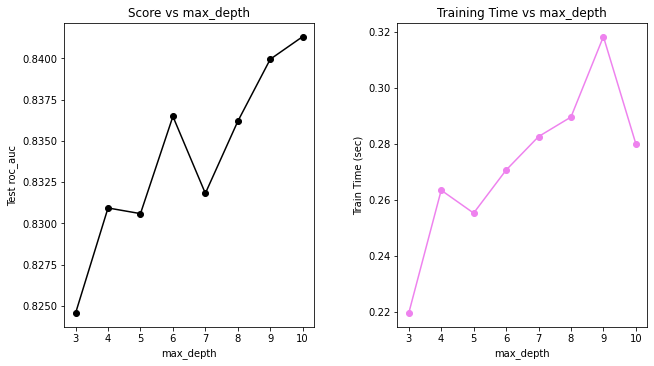

In [139]:
param_grid = {
    'max_depth': [3,4,5, 6, 7, 8, 9, 10]
}


grid_search = GridSearchCV(estimator=clf_b, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train_b, y_train_b)

test_scores = grid_search.cv_results_['mean_test_score']
train_time = grid_search.cv_results_['mean_fit_time']
param_values = list(grid_search.cv_results_['param_max_depth'])

plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.plot(param_values, test_scores, 'o-', label='test', color='black')
plt.xlabel('max_depth')
plt.ylabel('Test roc_auc')
plt.title('Score vs max_depth')

plt.subplot(122)
plt.plot(param_values, train_time, 'o-', color='violet')
plt.xlabel('max_depth')
plt.ylabel('Train Time (sec)')
plt.title('Training Time vs max_depth')

plt.tight_layout(pad=4)
plt.show()

As we can see, the scoring gets bigger as we increase the max_depth. however we noticed the bigger max_depth is- we overfit the model on the training set. also, we can see that there is a very big "bump" on the training time as max_depth gets bigger, but it gets lower after it reaches 6

Fitting 5 folds for each of 8 candidates, totalling 40 fits


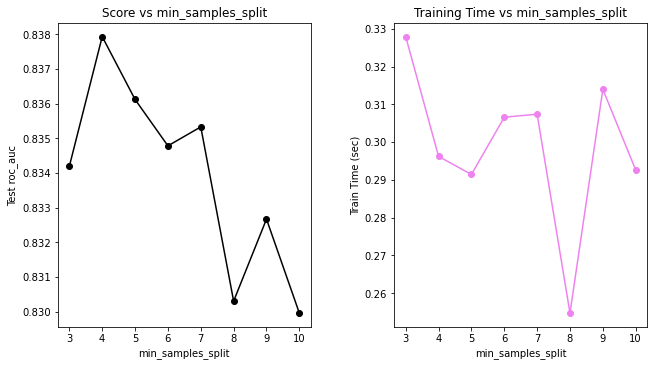

In [140]:
param_grid = {
    'min_samples_split': [3,4,5, 6, 7, 8, 9, 10]
}


grid_search = GridSearchCV(estimator=clf_b, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train_b, y_train_b)

test_scores = grid_search.cv_results_['mean_test_score']
train_time = grid_search.cv_results_['mean_fit_time']
param_values = list(grid_search.cv_results_['param_min_samples_split'])

plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.plot(param_values, test_scores, 'o-', label='test', color='black')
plt.xlabel('min_samples_split')
plt.ylabel('Test roc_auc')
plt.title('Score vs min_samples_split')

plt.subplot(122)
plt.plot(param_values, train_time, 'o-', color='violet')
plt.xlabel('min_samples_split')
plt.ylabel('Train Time (sec)')
plt.title('Training Time vs min_samples_split')

plt.tight_layout(pad=4)
plt.show()

Fitting 5 folds for each of 8 candidates, totalling 40 fits


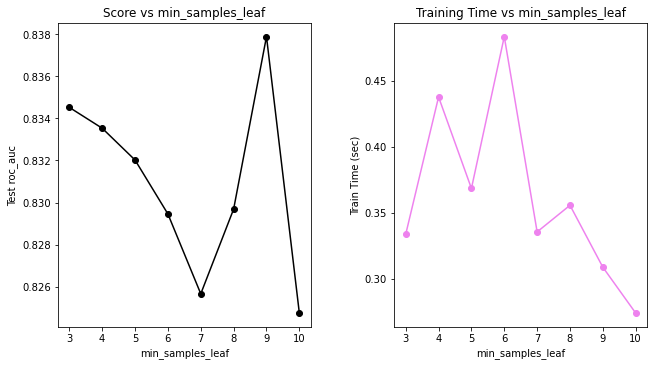

In [141]:
param_grid = {
    'min_samples_leaf': [3,4,5, 6, 7, 8, 9, 10]
}


grid_search = GridSearchCV(estimator=clf_b, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train_b, y_train_b)

test_scores = grid_search.cv_results_['mean_test_score']
train_time = grid_search.cv_results_['mean_fit_time']
param_values = list(grid_search.cv_results_['param_min_samples_leaf'])

plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.plot(param_values, test_scores, 'o-', label='test', color='black')
plt.xlabel('min_samples_leaf')
plt.ylabel('Test roc_auc')
plt.title('Score vs min_samples_leaf')

plt.subplot(122)
plt.plot(param_values, train_time, 'o-', color='violet')
plt.xlabel('min_samples_leaf')
plt.ylabel('Train Time (sec)')
plt.title('Training Time vs min_samples_leaf')

plt.tight_layout(pad=4)
plt.show()

In a similar fashion, min_samples_split and min_samples_leaf also have a "bump" for some values. we can see that the score gets lower as we increase min_samples_split/min_samples_leaf. We didnt take the lowest values as it causes overfitting on training set

# Conclusion

We used 5 classifiers:
*   SVM
*   Linear Regression
*   KNN
*   Decision Tree
*   Random Forest


We managed to reach around the same values for all classifiers. however, the model that had the biggest ROC-AUC (and also accuracy...) was Random Forest.

Some strengths and weaknesses of the different classifiers:

* The random forest classifier is known to have high accuracy and ROC-AUC and
isnt too sensitive to overfitting. however, this model is computationally expensive.
* SVM has high accuracy and ROC-AUC scores, however its very sensitive to hyperparameter tuning.
* Logistic Regression is simple and easy to interpret, however it is known to be less accurate than random forests or SVM.
* KNN is simple, easy to interpret and can handle nonlinear data. however, its known to be less accurate than other classifiers and is also sensitive to the choice of k.
* Decision Tree classifier is easy to interpret and can handle nonlinear data. However, its less accurate than other classifiers and is sensitive to overfitting

As we can see, random forest is the best classifier out of this 5 (theoretically) and we got the best ROC-AUC for it. in that case, we will fit the provided test set using the random forest model

# finishing up

We converted our provided test dataset test_data.xlxl file to a .csv file and ran it on part 1 of the project (and changed some things, because we cant delete columns now). after that, we run it on the the same thing as "Initialization & fixing part 1" part as is in this project.
We named it test_data.csv, which is provided in the directory

In [142]:
train_df = pd.read_csv('startup_dataset.csv')
test_df = pd.read_csv('test_set_after_part_1.csv')
X_train = train_df.drop(['target'], axis=1)
y_train = train_df['target']
X_test = test_df

clf_b already holds the classifier that we decided to use

In [143]:
clf_b.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=3, min_samples_split=4)

In [144]:
predictions = clf_b.predict(X_test)

In [145]:
output_df = pd.DataFrame({'Target123': predictions})

In [146]:
output_df.to_csv('Target123.csv', index=False)

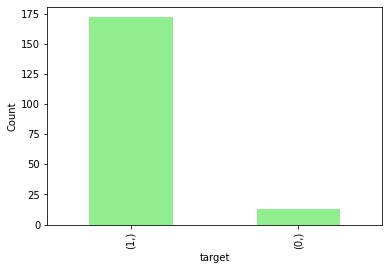

In [147]:
plt.figure()
output_df.value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('target')
plt.ylabel('Count')
plt.show()

We can see that the results are mostly '1'

I didnt find a way to simply remove the name of the column, so I did it manually